# Baseball_Case_Study_Project :-  DataTrained   |   Evaluation_Project_1


#### Submitted by: Tamali Saha (tamali428@gmail.com)

## Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Import data from github and start the preprocessing steps:

In [34]:
# import data and check 6 different samples

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.sample(n=6) 

W    R    AB     H   2B  3B   HR   BB    SO  SB   RA   ER   ERA  CG  \
15  100  647  5484  1386  288  39  137  506  1267  69  525  478  2.94   1   
9    78  748  5640  1495  294  33  161  478  1148  71  753  694  4.31   3   
4    74  689  5605  1515  289  49  151  455  1259  83  803  746  4.64   7   
13   76  656  5544  1379  262  22  198  478  1336  69  726  677  4.16   6   
23   67  573  5420  1361  251  18  100  471  1107  69  760  698  4.41   3   
12   85  661  5417  1331  243  21  176  435  1150  52  675  630  3.94   2   

    SHO  SV   E  
15   15  62  96  
9    10  40  97  
4    12  35  86  
13   12  45  94  
23   10  44  90  
12   12  46  93

In [35]:
# checking shapes

data.shape

(30, 17)

#### Observations:

This Dataset has 30 rows and 17 columns. Let's study the column's names and their charectaristics.

In [36]:
# checking columns names

data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Observations:

Actually here the column names in the data that is not making any sense.
Now, the following details are given with the help of wikipedia (https://en.wikipedia.org/wiki/Baseball_statistics).

###### Batting statistics:
1. R – Runs scored: number of times a player crosses home plate
2. AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
3. H – Hit: reaching base because of a batted, fair ball without error by the defense
4. 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
5. 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
6. HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
7. BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

###### Pitching statistics:
1. W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
2. SO – Strikeout: number of batters who received strike three
3. RA – Run average: number of runs allowed times nine divided by innings pitched
4. ER – Earned run: number of runs that did not occur as a result of errors or passed balls
5. ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
6. CG – Complete game: number of games where player was the only pitcher for their team
7. SHO –  Shutout: number of complete games pitched with no runs allowed
8. SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
9. E

###### Baserunning statistics:
1. SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense


##### So let's rename it as directed in the problem statement and that will be helpful to making sense.

In [37]:
# replacing the abbrevations with Complete word

data.columns=['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks'
              , 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs', 'Earned_Run_Average_(ERA)'
              ,  'Complete_Games', 'Shutouts', 'Saves', 'Errors']
data.head()

Wins  Runs  At_Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   
2    81   669     5439  1395      303       29       141    533        1157   
3    76   622     5533  1381      260       27       136    404        1231   
4    74   689     5605  1515      289       49       151    455        1259   

   Stolen_Bases  Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  \
0           104           641          601                      3.73   
1            70           700          653                      4.07   
2            86           640          584                      3.67   
3            68           701          643                      3.98   
4            83           803          746                      4.64   

   Complete_Games  Shutouts  Saves  Errors  
0               2         8     56      88  
1               2        12     45      86  
2              11        10     38      79  
3               7         9     37     101  
4               7        12     35      86

### Checking Null:

In [38]:
#checking null values

null_val= data.isna().sum()

Wins                        0
Runs                        0
At_Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen_Bases                0
Runs_Allowed                0
Earned_Runs                 0
Earned_Run_Average_(ERA)    0
Complete_Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

In [40]:
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l , axis =1, keys =['Null Values', 'Null Values percentage']))

                          Missing Values  % Missing data
Wins                                   0             0.0
Runs                                   0             0.0
At_Bats                                0             0.0
Hits                                   0             0.0
Doubles                                0             0.0
Triples                                0             0.0
Homeruns                               0             0.0
Walks                                  0             0.0
Strikeouts                             0             0.0
Stolen_Bases                           0             0.0
Runs_Allowed                           0             0.0
Earned_Runs                            0             0.0
Earned_Run_Average_(ERA)               0             0.0
Complete_Games                         0             0.0
Shutouts                               0             0.0
Saves                                  0             0.0
Errors                         

<AxesSubplot:>

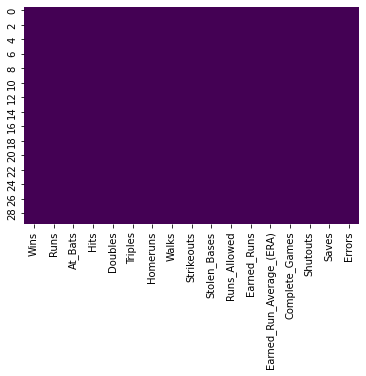

In [41]:
sns.heatmap(data.isnull(),cbar=False,cmap = 'viridis')

#### Observations: 

No null values are present in the total dataset.

### Checking duplicate:

In [42]:
#checking duplicate

data.duplicated().sum()

0

#### Observations:

No duplicate rows are present in the dataset.

### Checking different statistical parameter:

In [43]:
data.describe()

Wins        Runs      At_Bats         Hits     Doubles  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

         Triples    Homeruns       Walks  Strikeouts  Stolen_Bases  \
count  30.000000   30.000000   30.000000    30.00000     30.000000   
mean   31.300000  163.633333  469.100000  1248.20000     83.500000   
std    10.452355   31.823309   57.053725   103.75947     22.815225   
min    13.000000  100.000000  375.000000   973.00000     44.000000   
25%    23.000000  140.250000  428.250000  1157.50000     69.000000   
50%    31.000000  158.500000  473.000000  1261.50000     83.500000   
75%    39.000000  177.000000  501.250000  1311.50000     96.500000   
max    49.000000  232.000000  570.000000  1518.00000    134.000000   

       Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  Complete_Games  \
count     30.000000    30.000000                 30.000000       30.000000   
mean     688.233333   635.833333                  3.956333        3.466667   
std       72.108005    70.140786                  0.454089        2.763473   
min      525.000000   478.000000                  2.940000        0.000000   
25%      636.250000   587.250000                  3.682500        1.000000   
50%      695.500000   644.500000                  4.025000        3.000000   
75%      732.500000   679.250000                  4.220000        5.750000   
max      844.000000   799.000000                  5.040000       11.000000   

        Shutouts      Saves      Errors  
count  30.000000  30.000000   30.000000  
mean   11.300000  43.066667   94.333333  
std     4.120177   7.869335   13.958889  
min     4.000000  28.000000   75.000000  
25%     9.000000  37.250000   86.000000  
50%    12.000000  42.000000   91.000000  
75%    13.000000  46.750000   96.750000  
max    21.000000  62.000000  126.000000

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Games            30 non-null     int64  
 14  Shutouts    

#### Observations:

1. No null values are present.
2. All of the features are numarical datatypes.
3. Target variable is 'Wins' and it is a int64 datatype. So it is a Regression problem.
4. Seems some skewness and outliers are present as there is a big jump between 75% quantile and max value of Runs, Complete_Games and Errors.
5. Seems outliers are present in the overall dataset.

### EDA :

### Univariate Analysis:

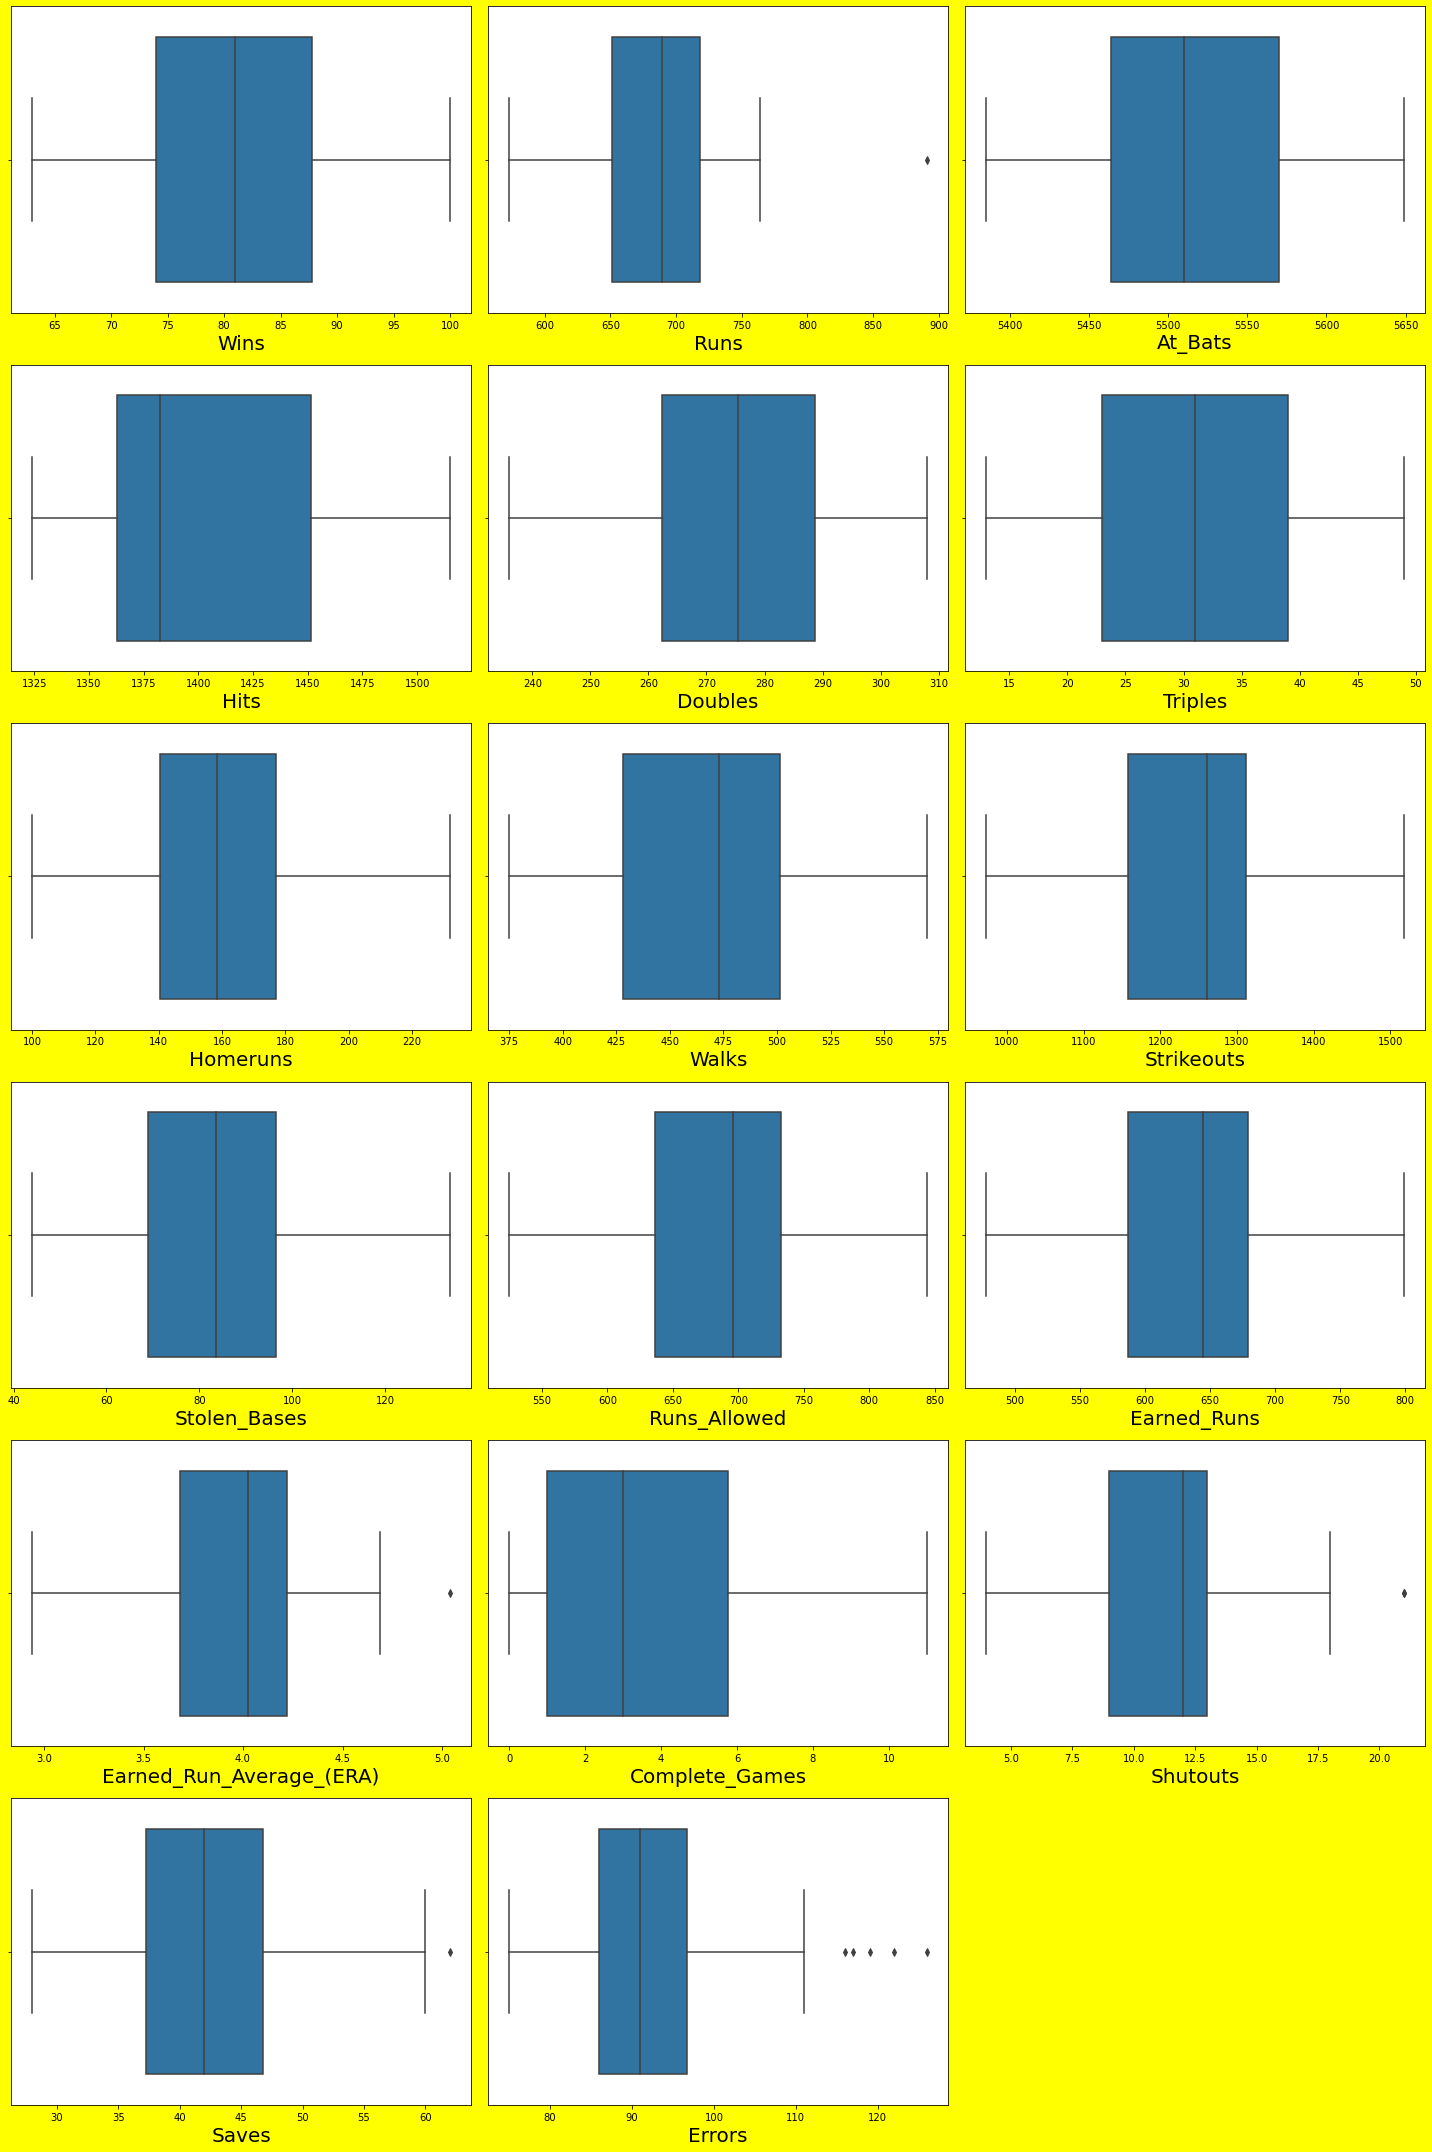

In [45]:
plt.figure(figsize=(20,30),facecolor='yellow' )
plno=1
for x in data:
    if plno<=17:
        plt.subplot(6,3,plno)
        sns.boxplot(data[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

#### Observations:
1. For Runs, Saves, Complete_Games and ERA, one outliers is presents.
2. Errors has some outliers.

    #### Remove this outliers laters. Let's check more plots.

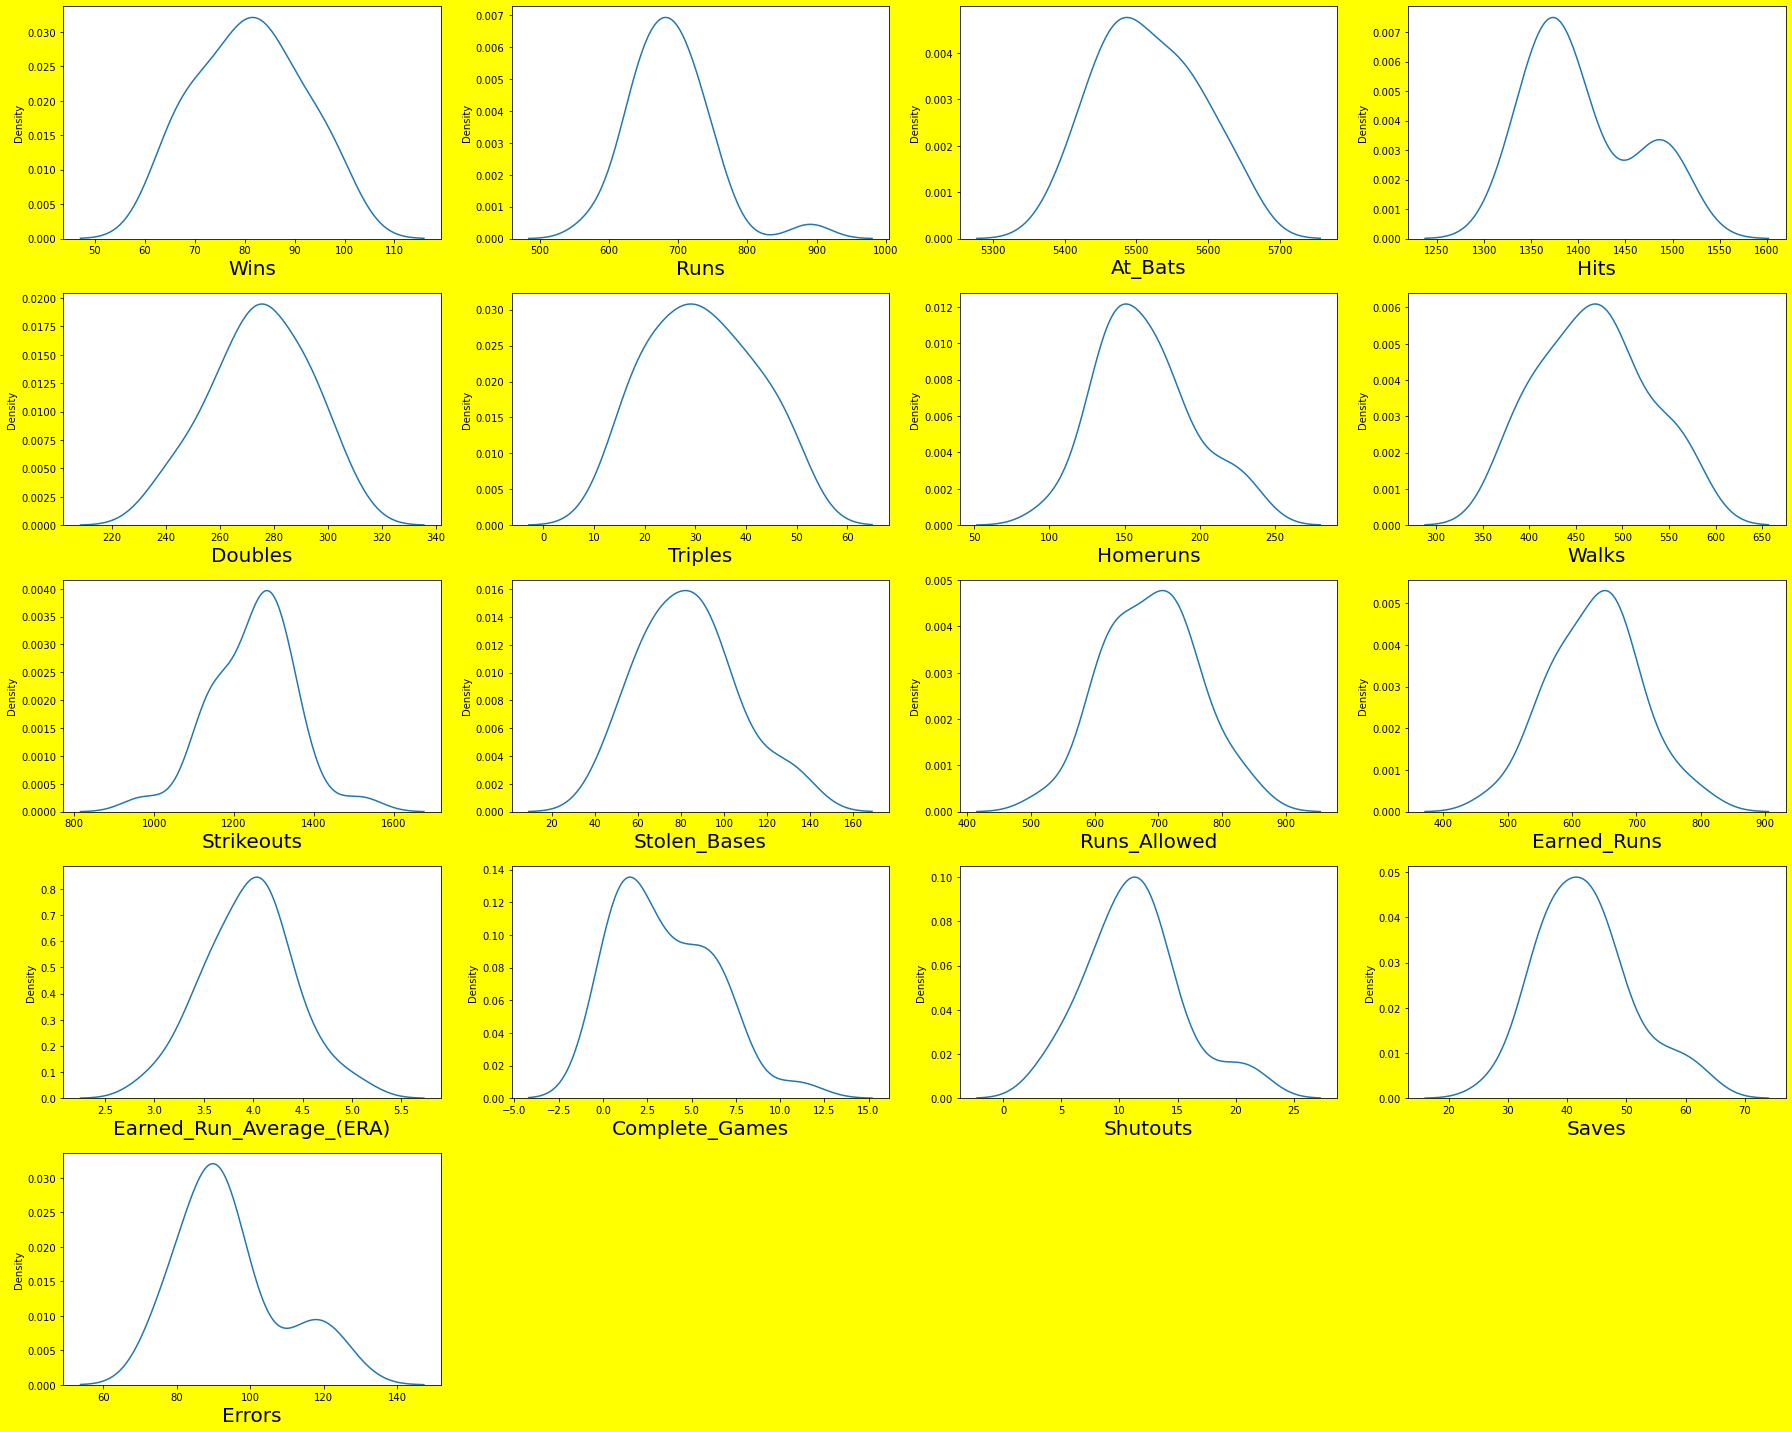

In [46]:
plt.figure(figsize=(25,20),facecolor='yellow' )
plno=1
for x in data:
    if plno<=17:
        plt.subplot(5,4,plno)
        sns.distplot(data[x], hist=False)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

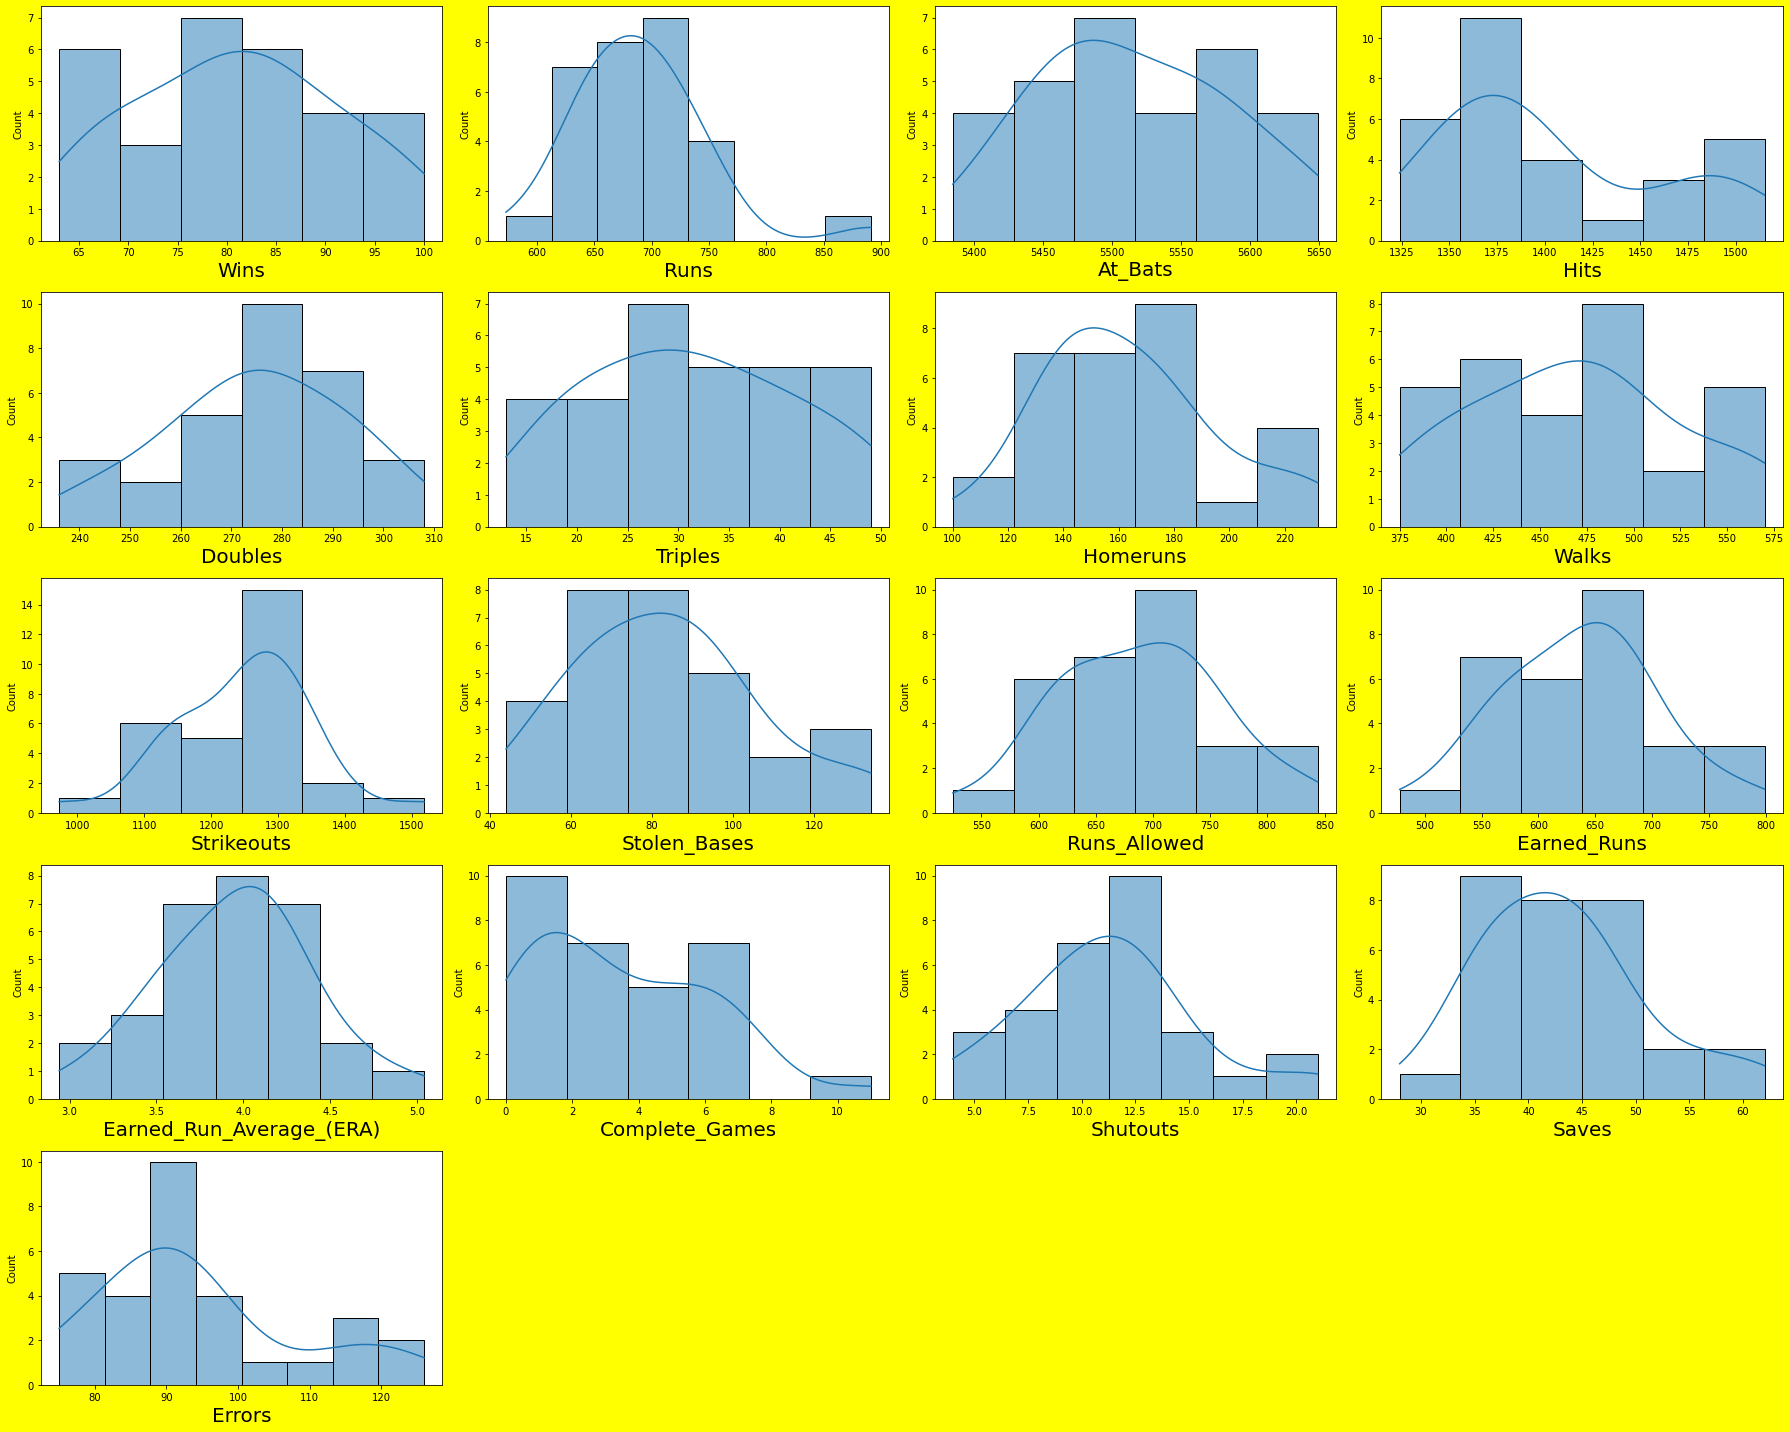

In [47]:
plt.figure(figsize=(25,20),facecolor='yellow' )
plno=1
for x in data:
    if plno<=17:
        plt.subplot(5,4,plno)
        sns.histplot(data[x], kde=True)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

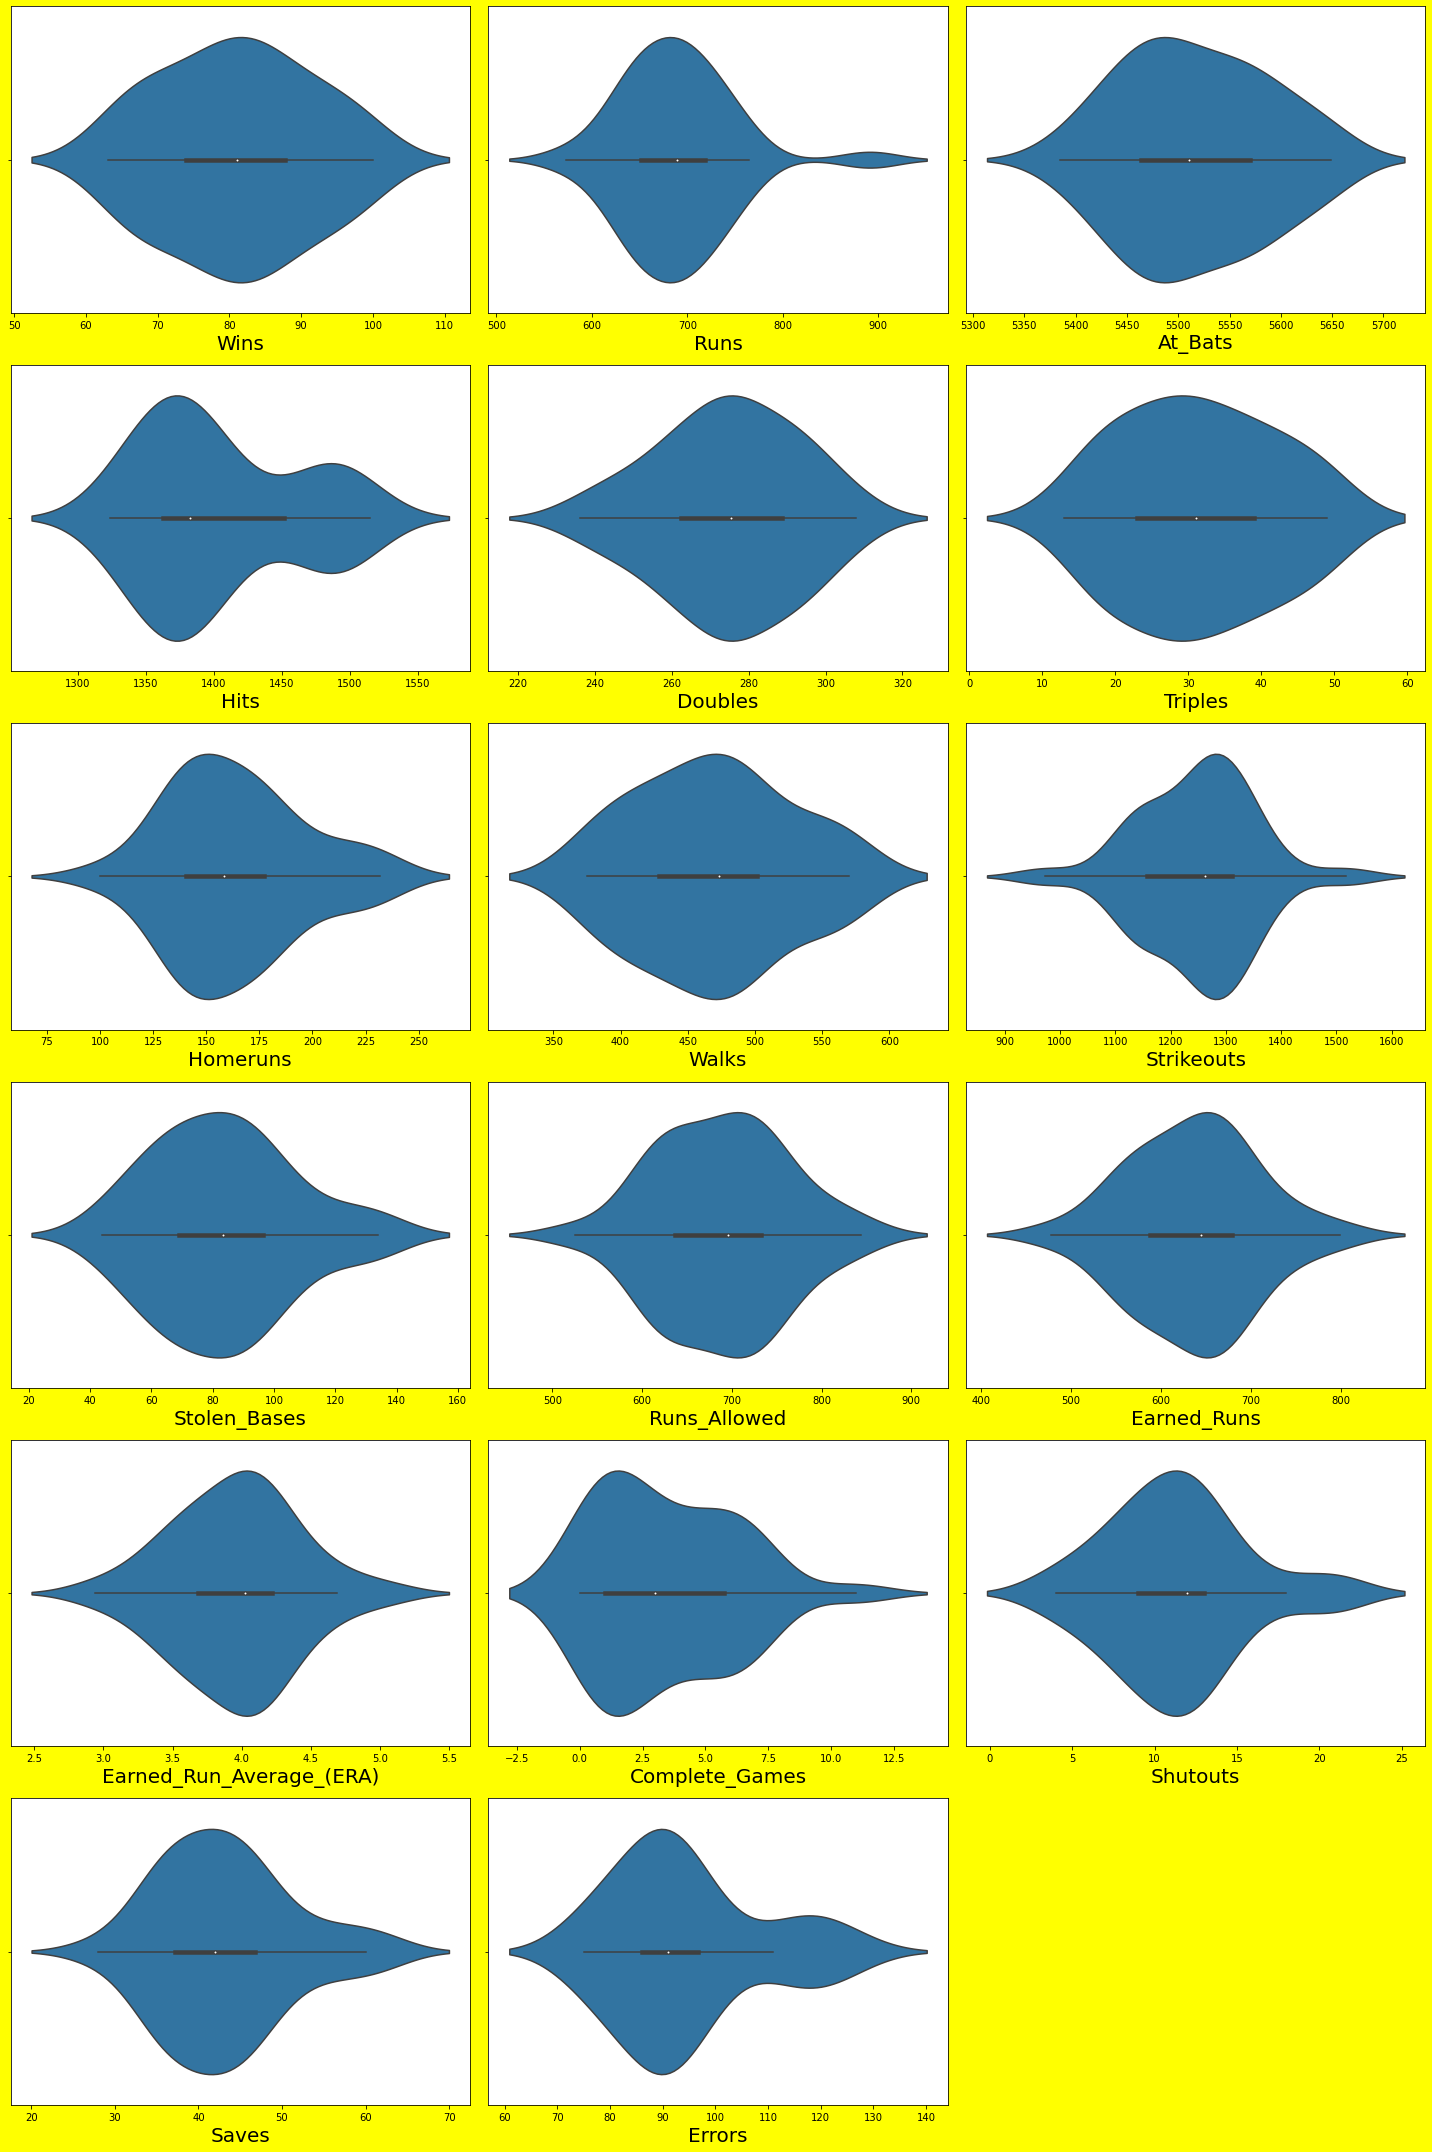

In [48]:
plt.figure(figsize=(20,30),facecolor='yellow' )
plno=1
for x in data:
    if plno<=17:
        plt.subplot(6,3,plno)
        sns.violinplot(data[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

#### Observations:

1. All of the features are not normally distributed
2. Seems Runs ,Complete_Games, Shutouts, Saves, Errors are right skewed
3. Seems Rus_Allowed, Earned_Runs and Earned_Run_Average_(ERA) are same in distribution
4. Also seems Shououts and Complete_Games are same in distribution
5. Most of the Runs values are in between 600 to 800
6. Most of the ERA values are in between 3 to 4.5
7. outliers are present in errors

##### Here the winner is one who scored maximum runs. Let's check the relationship between Runs with different features.

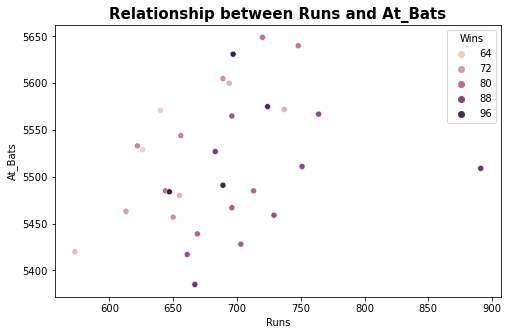

In [49]:
# Checking the relation between Runs and At_Bats

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and At_Bats',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['At_Bats'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('At_Bats')
plt.show()

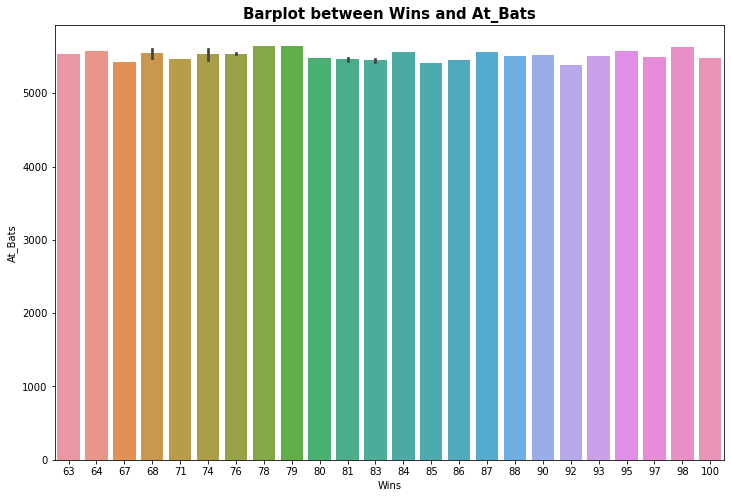

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="At_Bats", data=data)
plt.title('Barplot between Wins and At_Bats',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. The Runs are in the range 650-750.
2. One outliers is present for Runs.
3. There is no specific change of At_Bats wit respect to wining rates.

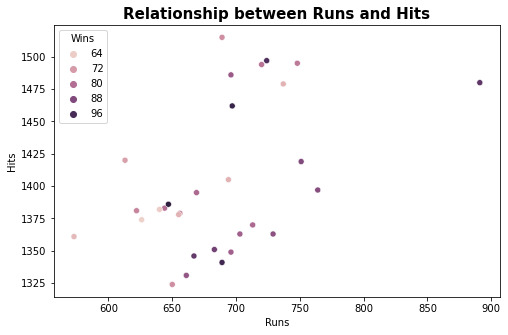

In [51]:
# Checking the relation between Runs and Hits

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Hits',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Hits'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Hits')
plt.show()

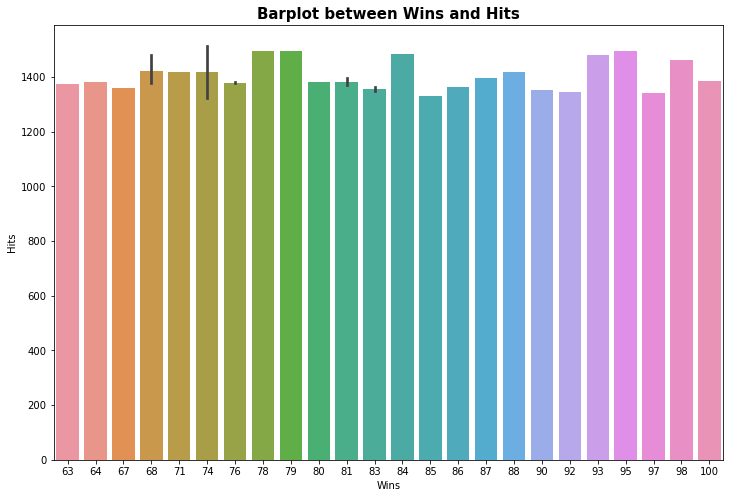

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Hits", data=data)
plt.title('Barplot between Wins and Hits',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. Where the Hits value is less than 1400, a good wining rate is present. There is no such increment of wins if the Hits value is increased(> 1500)
2. The wining rate is very less for Hits <1325
3. The wining rate is very less for Runs <650
4. Seems one outliers is present for Runs.

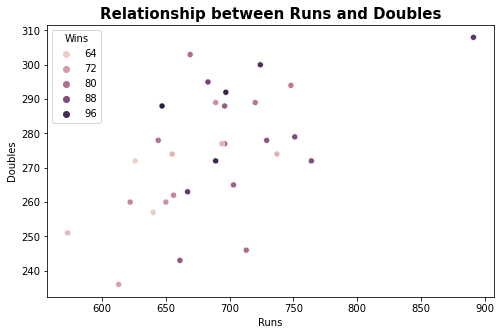

In [53]:
# Checking the relation between Runs and Doubles

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Doubles',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Doubles'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Doubles')
plt.show()

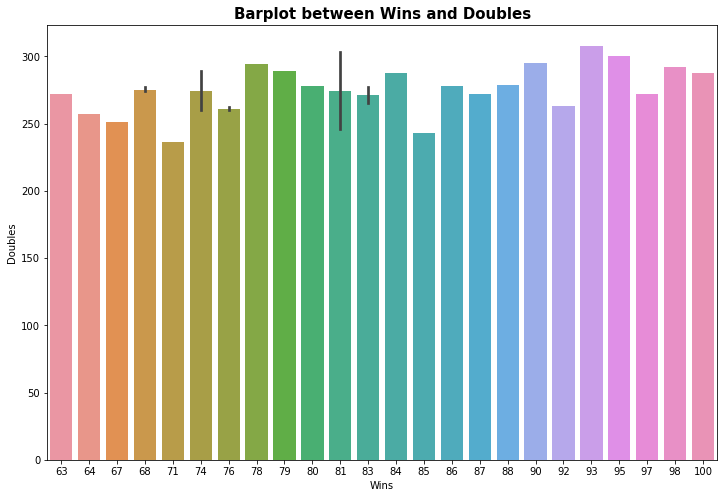

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Doubles", data=data)
plt.title('Barplot between Wins and Doubles',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. Here if Doubles increased, wining is also increased.
2. The range of Doubles is 260 - 300
3. the wining rate is very low for Doubles< 260. The team needs to keep the Double score >260 for a high wining chance.

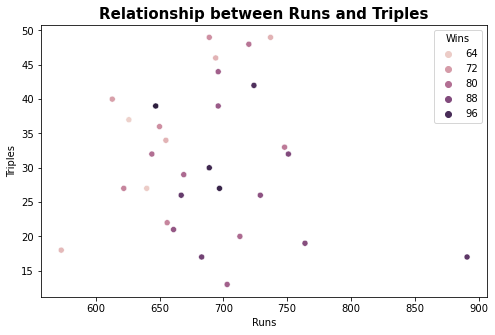

In [55]:
# Checking the relation between Runs and Triples

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Triples',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Triples'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Triples')
plt.show()

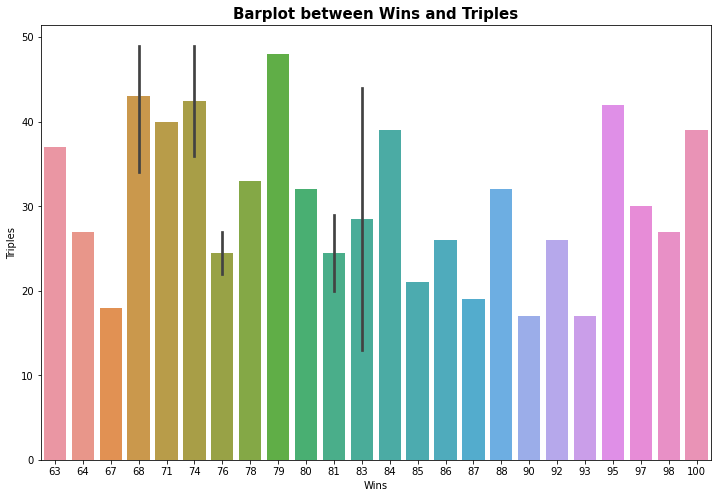

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Triples", data=data)
plt.title('Barplot between Wins and Triples',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. There is no clear relationship between triples and Wins
2. The range of Triples is 20-40

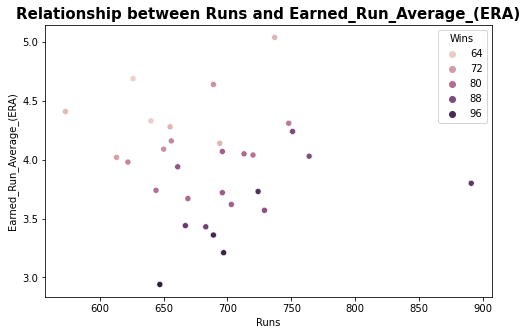

In [57]:
# Checking the relation between Runs and Earned_Run_Average_(ERA)

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Earned_Run_Average_(ERA)',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Earned_Run_Average_(ERA)'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Earned_Run_Average_(ERA)')
plt.show()

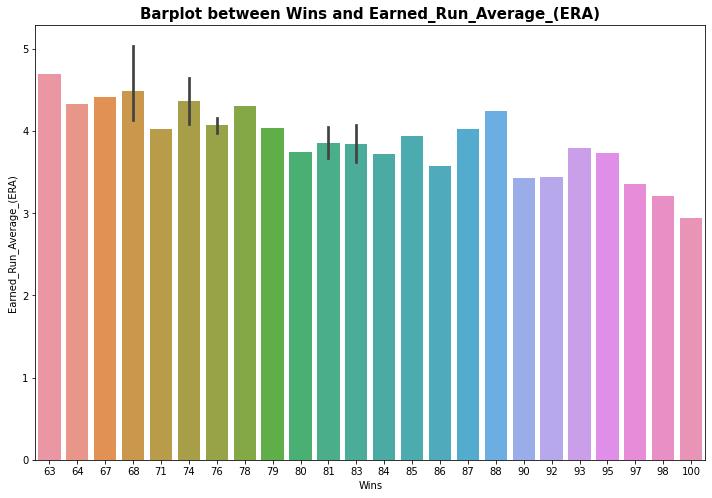

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Earned_Run_Average_(ERA)", data=data)
plt.title('Barplot between Wins and Earned_Run_Average_(ERA)',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. If ERA is increased, Wins is also decreased.
2. ERA range is in between 3.0 to 4.0 for good wining rate.
3. The wining rate is very less for ERA>4.0

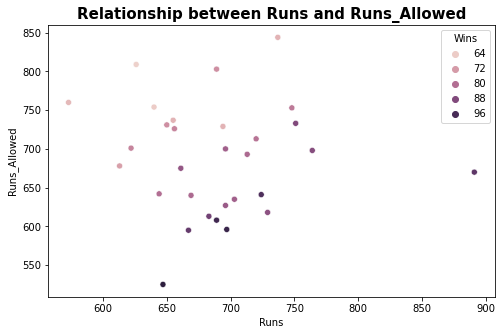

In [59]:
# Checking the relation between Runs and Runs_Allowed

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Runs_Allowed',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Runs_Allowed'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Runs_Allowed')
plt.show()

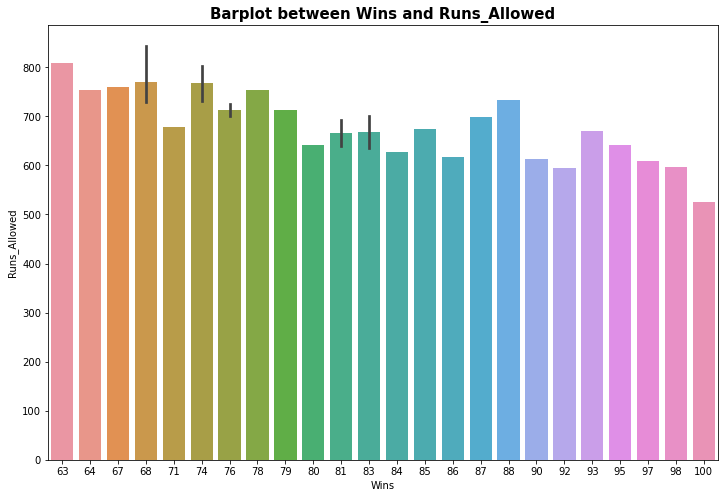

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Runs_Allowed", data=data)
plt.title('Barplot between Wins and Runs_Allowed',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. Wining is low for Runs_Allowed <700.
2. For wining in the game, the Runs_Allowed is in the range 550 to 700.
3. More Runs_Allowed gives advantage to hitter and the wining is low.

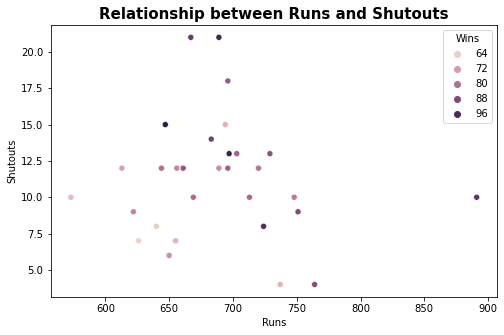

In [61]:
# Checking the relation between Runs and Shutouts

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Shutouts',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Shutouts'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Shutouts')
plt.show()

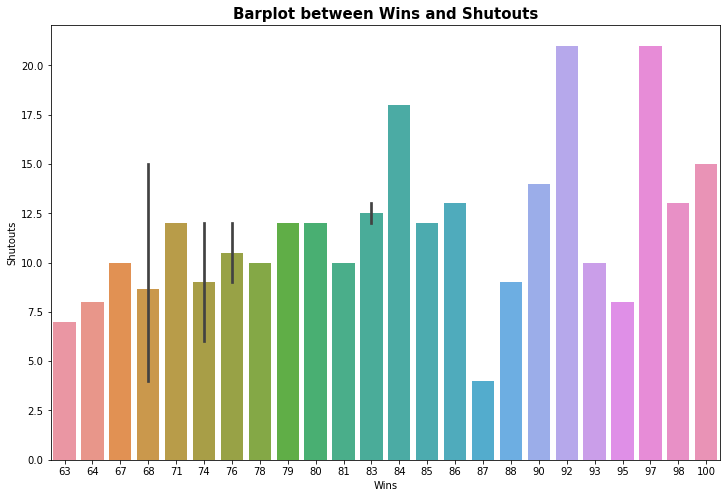

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Shutouts", data=data)
plt.title('Barplot between Wins and Shutouts',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. Wining rate is high for high saves.
2. Wins is very low if Shutouts < 7.5
3. range of shutouts is 7.5-15.0


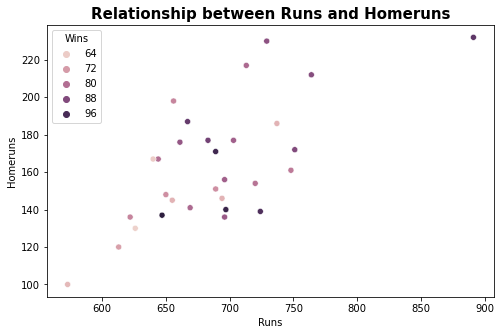

In [63]:
# Checking the relation between Runs and Homeruns

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Homeruns',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Homeruns'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Homeruns')
plt.show()

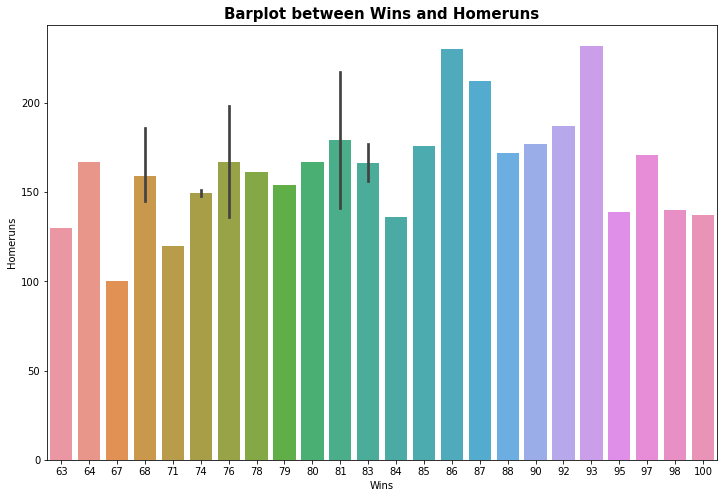

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Homeruns", data=data)
plt.title('Barplot between Wins and Homeruns',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. The best wining rate is shown for the range 130 to 180 for Homeruns.
2. If Homeruns increased, the wining possibility is also increased.
3. The wining is very less for Homeruns < 140

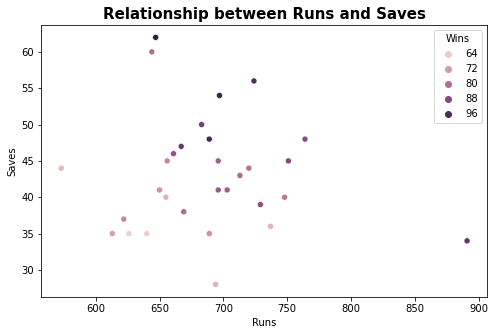

In [65]:
# Checking the relation between Runs and Saves

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Saves',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Saves'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Saves')
plt.show()

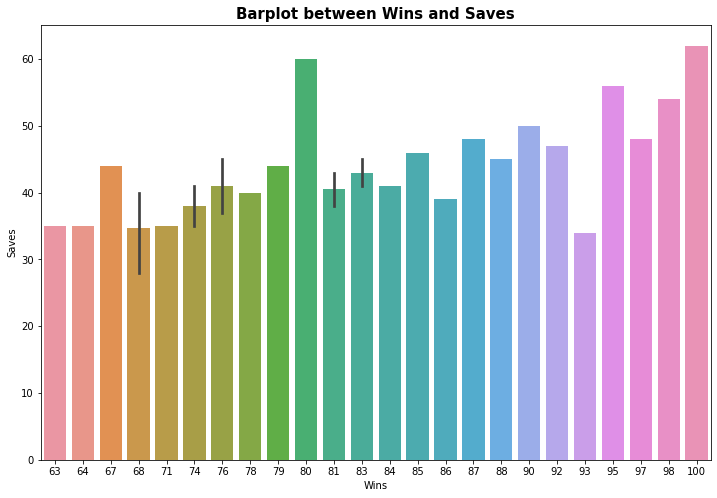

In [66]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Saves", data=data)
plt.title('Barplot between Wins and Saves',fontsize =15, fontweight='bold')
plt.show()

#### Observations:
1. Wins is high for high Saves (>45) value.
2. There is very less chance for wins if the value of Saves is <40
3. the range of saves is 35-55

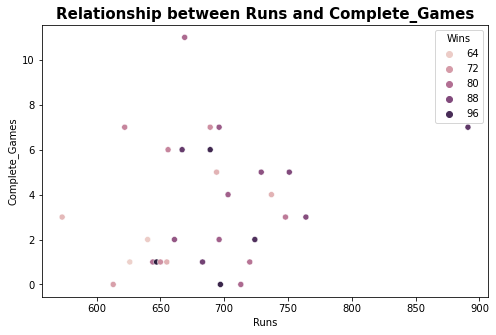

In [67]:
# Checking the relation between Runs and Complete_Games

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Complete_Games',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Complete_Games'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Complete_Games')
plt.show()

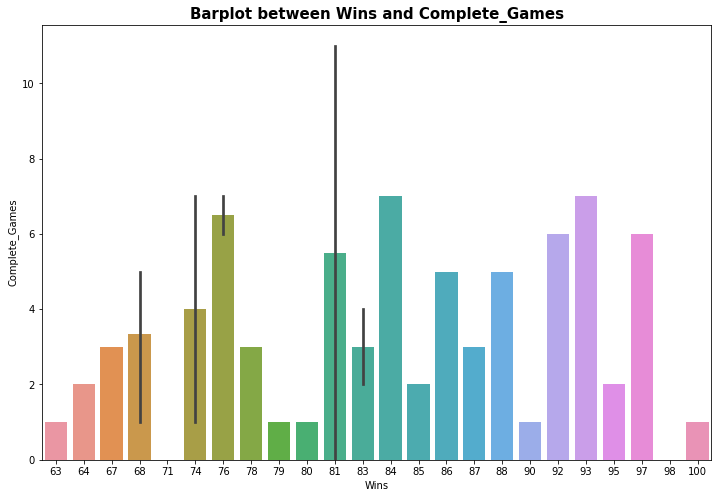

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Complete_Games", data=data)
plt.title('Barplot between Wins and Complete_Games',fontsize =15, fontweight='bold')
plt.show()

#### Observations: 
1. Low wining rate  have Complete_Games value <6
2. It should be in the range 1-6

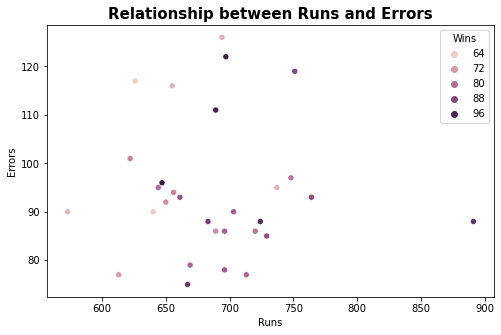

In [69]:
# Checking the relation between Runs and Errors

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Errors',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Errors'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Errors')
plt.show()

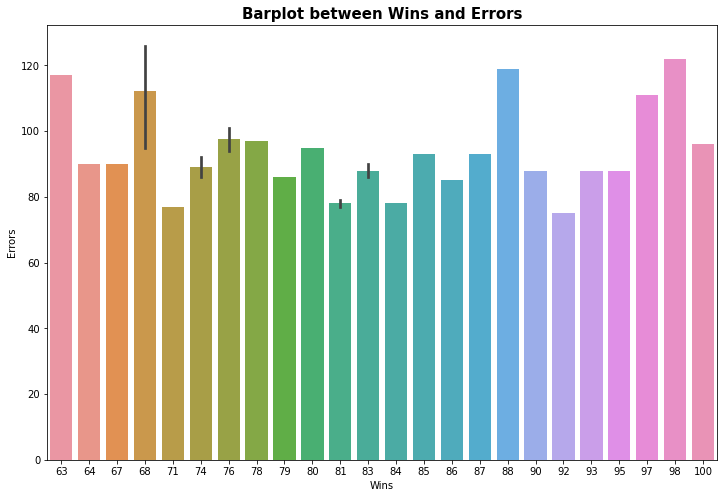

In [70]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Errors", data=data)
plt.title('Barplot between Wins and Errors',fontsize =15, fontweight='bold')
plt.show()

#### Observations:
1. For good winig rate, Error value should be low.
2. The Error placed in the range 80-100.
3. That would be very good if the Error is less than 90( as , the wining rate is high)

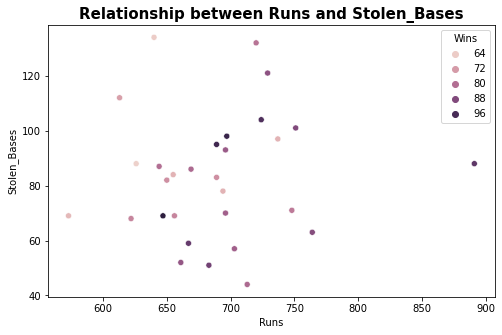

In [71]:
# Checking the relation between Runs and Stolen_Bases

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Stolen_Bases',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Stolen_Bases'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Stolen_Bases')
plt.show()

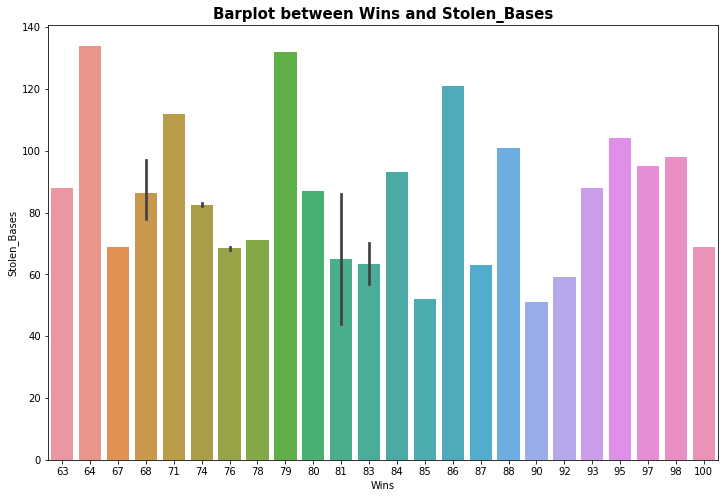

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Stolen_Bases", data=data)
plt.title('Barplot between Wins and Stolen_Bases',fontsize =15, fontweight='bold')
plt.show()

#### Observations:
Wins is high for Stolen_Bases<100

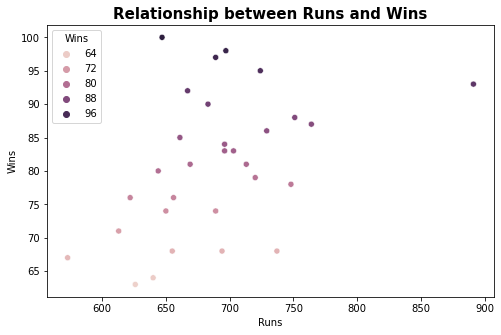

In [73]:
# Checking the relation between Runs and Stolen_Bases

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Wins',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Wins'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.show()

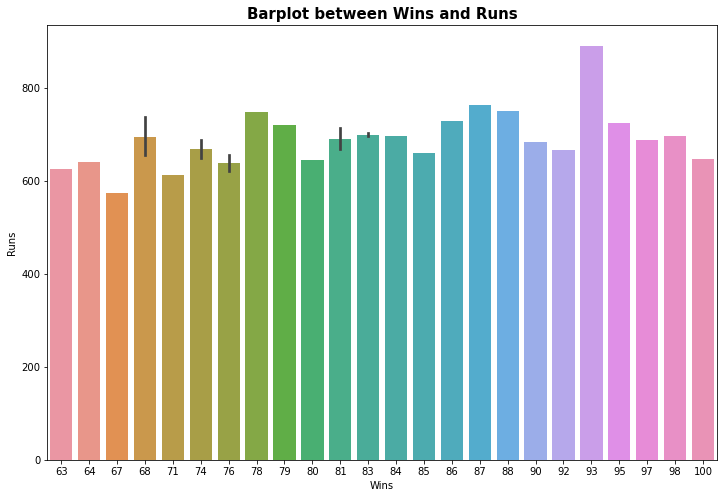

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Runs", data=data)
plt.title('Barplot between Wins and Runs',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

For high wining possibility the Run> 600

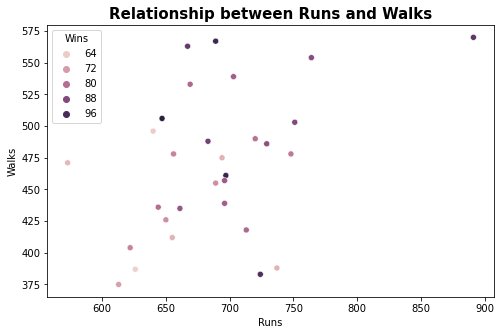

In [75]:
# Checking the relation between Runs and Walks

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Walks',fontsize =15, fontweight='bold')
sns.scatterplot(data['Runs'],data['Walks'],hue=data['Wins'])
plt.xlabel('Runs')
plt.ylabel('Walks')
plt.show()

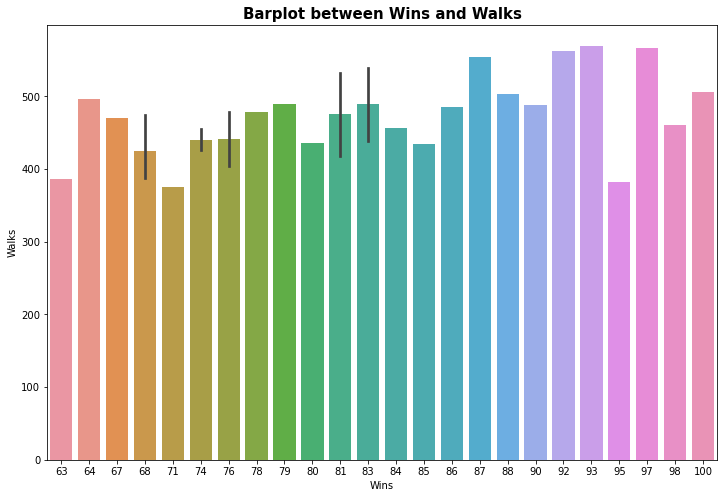

In [76]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Walks", data=data)
plt.title('Barplot between Wins and Walks',fontsize =15, fontweight='bold')
plt.show()

#### Observations:

1. Walks> 400 is the higher probability in Wins.
2. Range of Walks in between 400 -500

### Lets check the relationship between Lables(Wins) with different features.

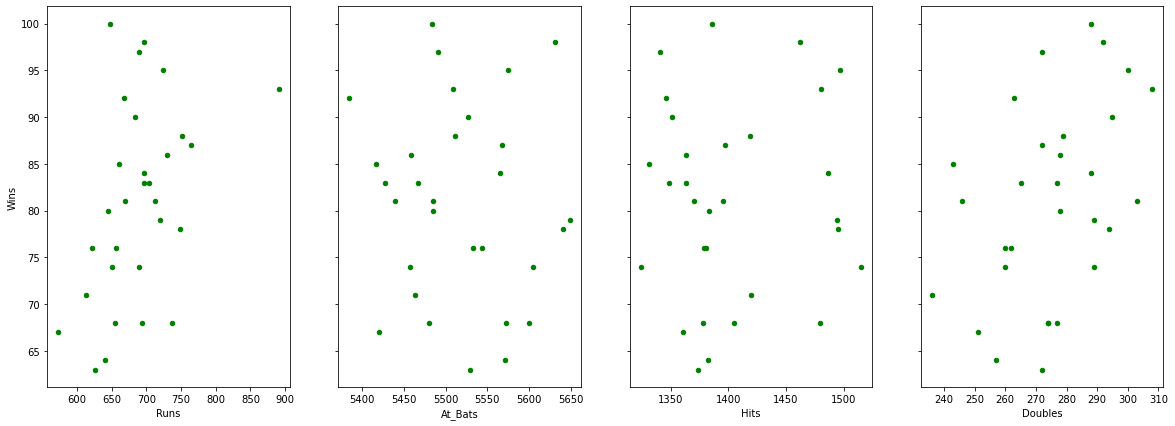

In [77]:
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Runs', y='Wins', ax=axs[0], figsize=(20,7),color ='g')
data.plot(kind='scatter', x='At_Bats', y='Wins', ax=axs[1],color ='g')
data.plot(kind='scatter', x='Hits', y='Wins', ax=axs[2],color ='g')
data.plot(kind='scatter', x='Doubles', y='Wins', ax=axs[3],color ='g')
plt.show()

#### Observations:

1. Most of the Runs are in range 600-750
2. No clear relationship is present between At_Bats, Hits and Doubles with Wins


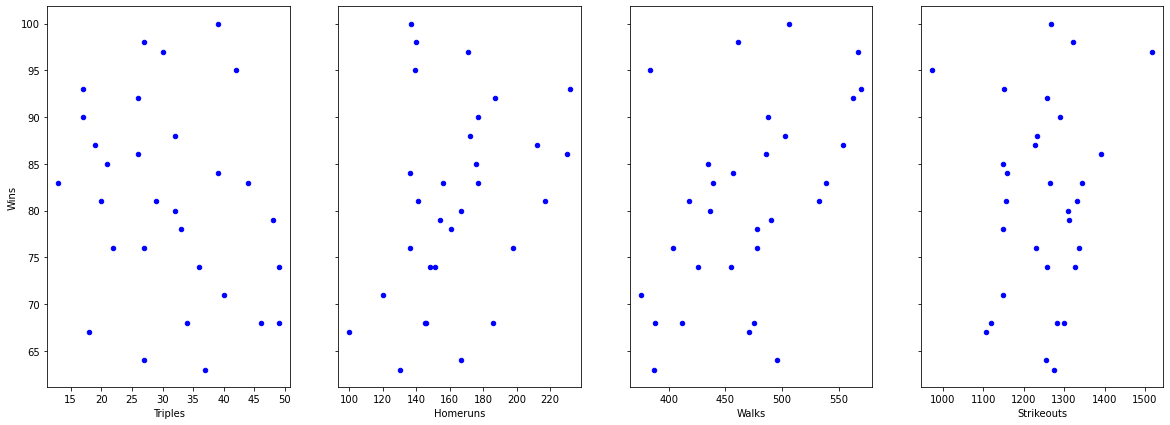

In [78]:
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Triples', y='Wins', ax=axs[0], figsize=(20,7),color ='b')
data.plot(kind='scatter', x='Homeruns', y='Wins', ax=axs[1],color ='b')
data.plot(kind='scatter', x='Walks', y='Wins', ax=axs[2],color ='b')
data.plot(kind='scatter', x='Strikeouts', y='Wins', ax=axs[3],color ='b')
plt.show()

#### Observations:

1. Most of the Strikeouts are in range 1100-1400
2. Wins is slightly increased with the increment of Homeruns and Walks
3. All the 4 graphs are very scattered with respect to pattern.

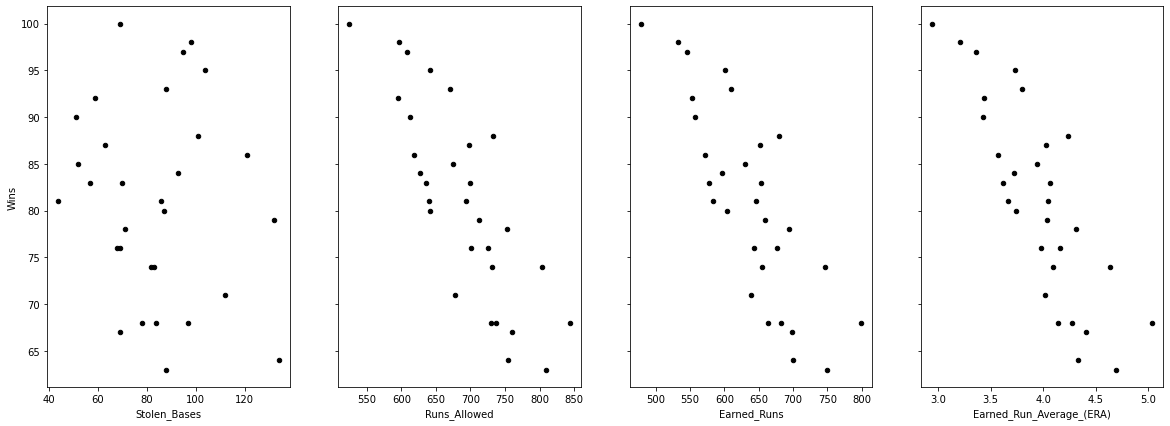

In [79]:
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Stolen_Bases', y='Wins', ax=axs[0], figsize=(20,7),color ='black')
data.plot(kind='scatter', x='Runs_Allowed', y='Wins', ax=axs[1],color ='black')
data.plot(kind='scatter', x='Earned_Runs', y='Wins', ax=axs[2],color ='black')
data.plot(kind='scatter', x='Earned_Run_Average_(ERA)', y='Wins', ax=axs[3],color ='black')
plt.show()

#### Observations:
1. Stolen_Bases and Wins has no clear relation.
2. Wins is high for low Runs_Allowed, Earned_Runs, Earned_Run_Average_(ERA)
3. The relationship of Runs_Allowed, Earned_Runs, Earned_Run_Average_(ERA) looks similar with Wins. Seems this 3 features are correlated. 

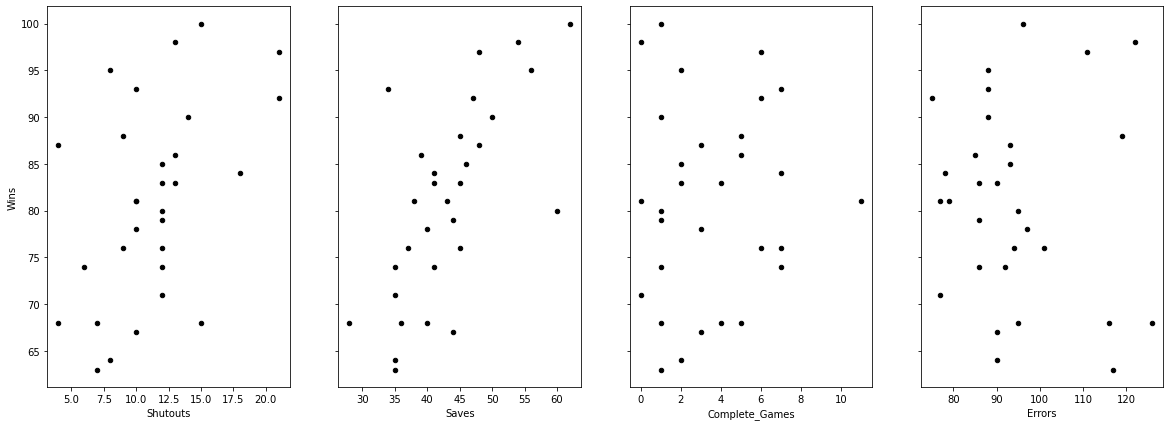

In [80]:
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Shutouts', y='Wins', ax=axs[0], figsize=(20,7),color ='black')
data.plot(kind='scatter', x='Saves', y='Wins', ax=axs[1],color ='black')
data.plot(kind='scatter', x='Complete_Games', y='Wins', ax=axs[2],color ='black')
data.plot(kind='scatter', x='Errors', y='Wins', ax=axs[3],color ='black')
plt.show()

#### Observations:
1. Wins has no clear relation with Complete_Games and Errors.
2. Seems Saves are directly proportional with wins i.e. there may be some positive relationship.
3. Shutouts and Errors are very scattered with respect to pattern.

### Bivariate Analysis:

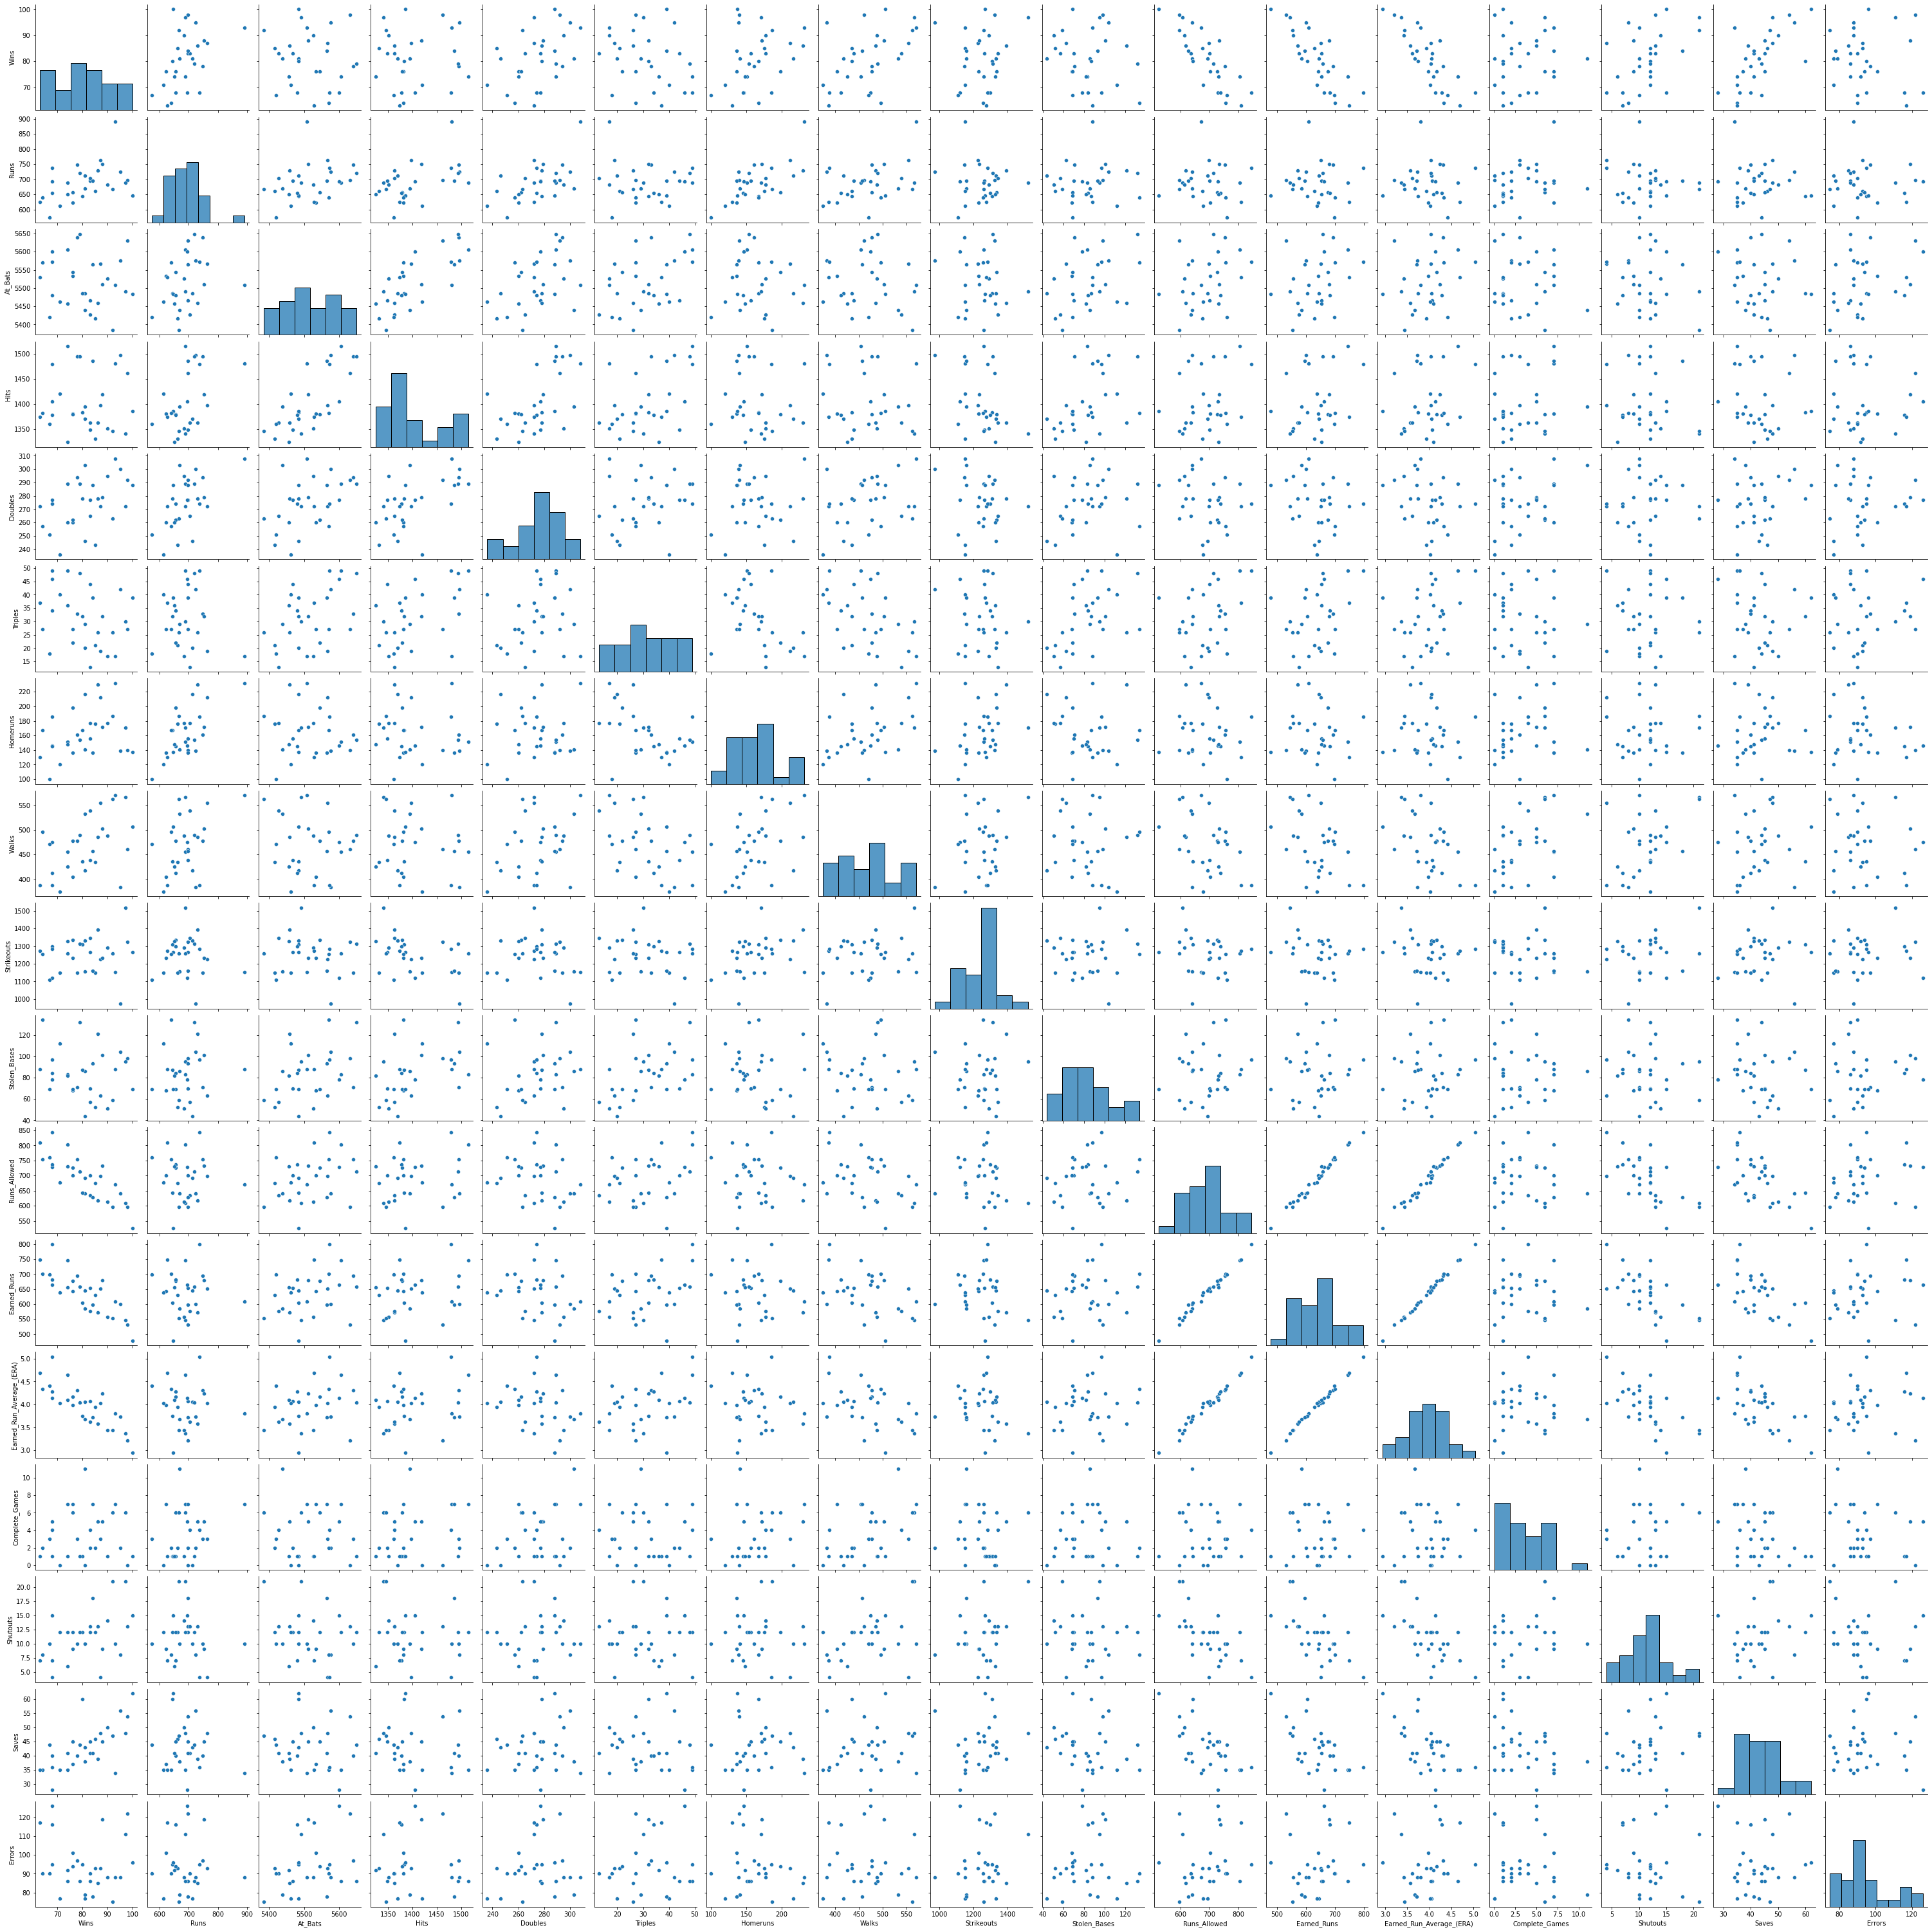

In [81]:
sns.pairplot(data)
plt.show()

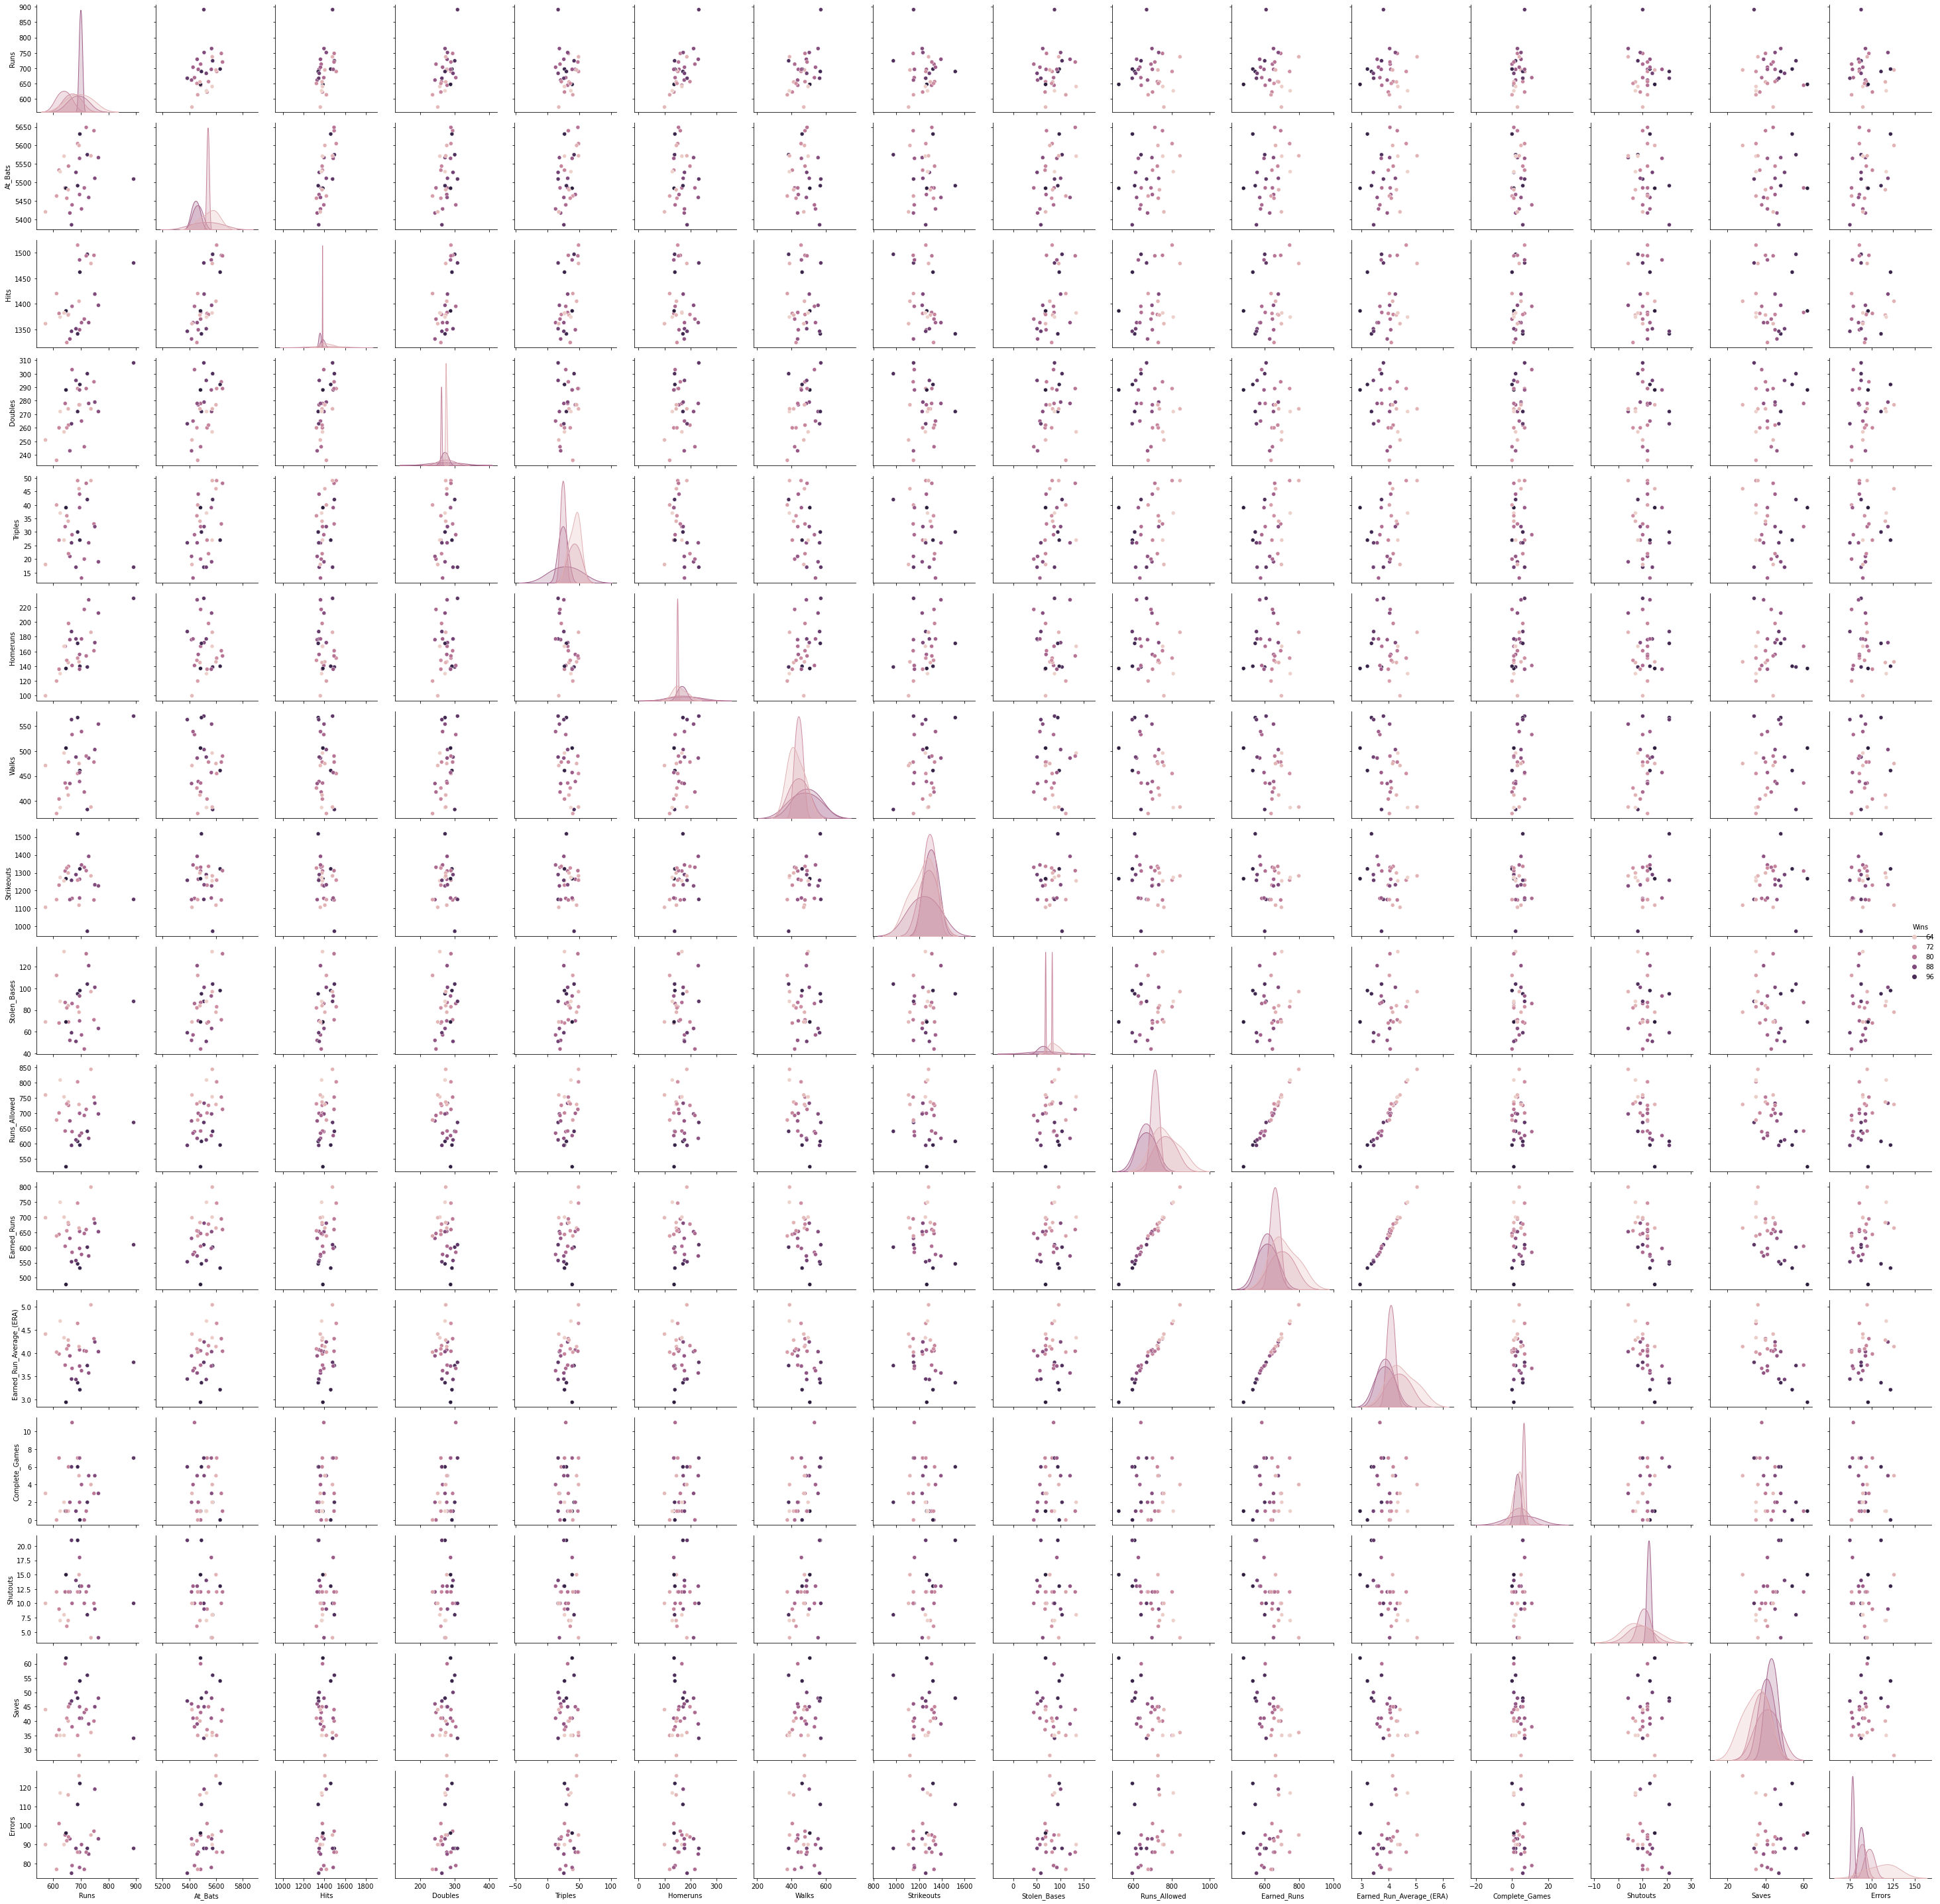

In [82]:
sns.pairplot(data, hue= "Wins", kind= 'scatter')
plt.tight_layout()
plt.show()

#### Observations:

1. Here seems 'Runs_Allowed', 'Earned_Runs' and 'Earned_Run_Average_(ERA)' are correlated.
2. Seems some of the features have outliers.
3. Most of the features are in scattred way.

#### Let's check the relationship between 'Runs_Allowed', 'Earned_Runs' and 'Earned_Run_Average_(ERA)' seems they are in some correlation(positive/ negetive)

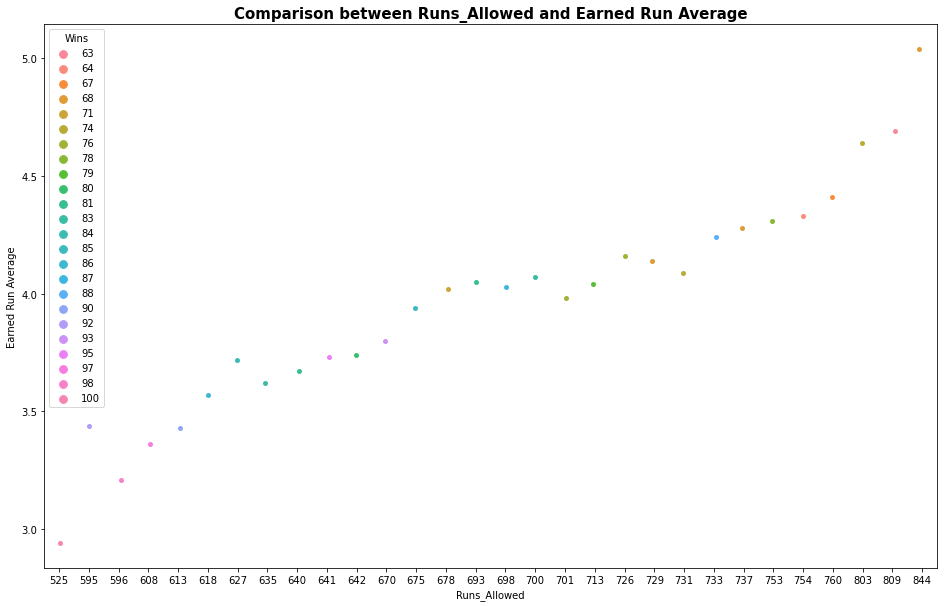

In [83]:
# Checking the relation between Earned_Run_Average_(ERA) and Runs_Allowed

plt.figure(figsize=[16,10])
plt.title('Comparison between Runs_Allowed and Earned Run Average',fontsize =15, fontweight='bold')
sns.stripplot(data['Runs_Allowed'],data['Earned_Run_Average_(ERA)'],hue=data['Wins'])
plt.xlabel('Runs_Allowed')
plt.ylabel('Earned Run Average')
plt.show()

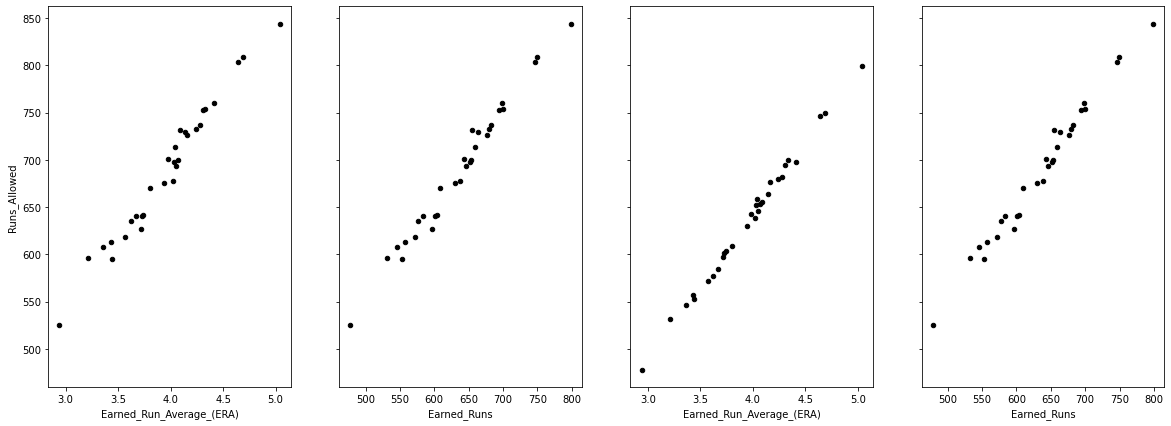

In [84]:
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Earned_Run_Average_(ERA)', y='Runs_Allowed', ax=axs[0], figsize=(20,7),color ='black',)
data.plot(kind='scatter', x='Earned_Runs', y='Runs_Allowed', ax=axs[1],color ='black')
data.plot(kind='scatter', x='Earned_Run_Average_(ERA)', y='Earned_Runs', ax=axs[2],color ='black')
data.plot(kind='scatter', x='Earned_Runs', y='Runs_Allowed', ax=axs[3],color ='black')
plt.show()

#### Observations:

1. Runs_Allowed, and Earned_Run_Average_(ERA) hold linear relationship.
2. Earned_Runs and Runs_Allowed hold linear relationship.
3. Earned_Run_Average_(ERA) and Earned_Runs hold linear relationship.
4. Earned_Runs and Runs_Allowed hold linear relationship.

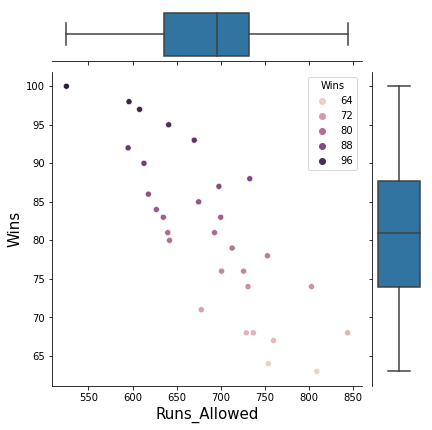

In [85]:
ax= sns.JointGrid(x="Runs_Allowed", y= "Wins", hue= "Wins", data= data)
ax.plot(sns.scatterplot, sns.boxplot)
ax.set_axis_labels(xlabel='Runs_Allowed', ylabel='Wins', fontsize=15)
plt.show()

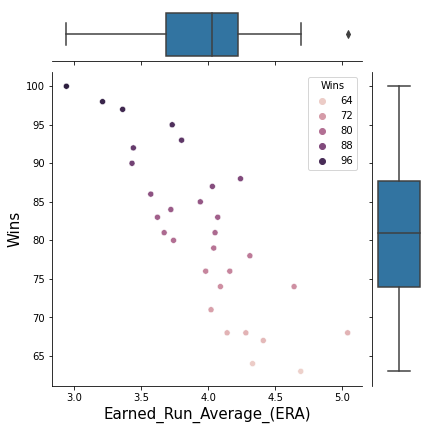

In [86]:
ax= sns.JointGrid(x="Earned_Run_Average_(ERA)", y= "Wins", hue= "Wins", data= data)
ax.plot(sns.scatterplot, sns.boxplot)
ax.set_axis_labels(xlabel='Earned_Run_Average_(ERA)', ylabel='Wins', fontsize=15)
plt.show()

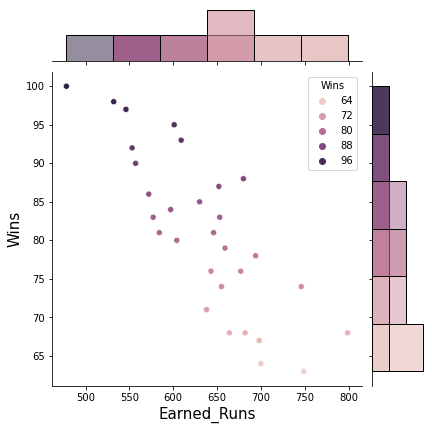

In [87]:
ax= sns.JointGrid(x="Earned_Runs", y= "Wins", hue= "Wins", data= data)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Earned_Runs', ylabel='Wins', fontsize=15)
plt.show()

#### Observations:

1. Runs_Allowed and Wins have negetive relationship i.e. they are inversely proportional.
2. Earned_Runs and Wins have negetive relationship i.e. they are inversely proportional.
3. Earned_Run_Average_(ERA) and Wins have negetive relationship i.e. they are inversely proportional.

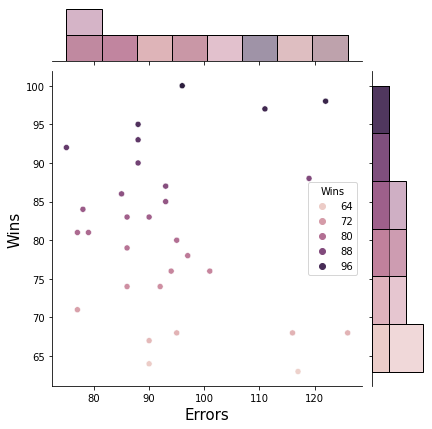

In [88]:
ax= sns.JointGrid(x="Errors", y= "Wins", hue= "Wins", data= data)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Errors', ylabel='Wins', fontsize=15)
plt.show()

#### Observations:

1. Again it is seen that, there are some outliers and if the range of error is in between 80-100.

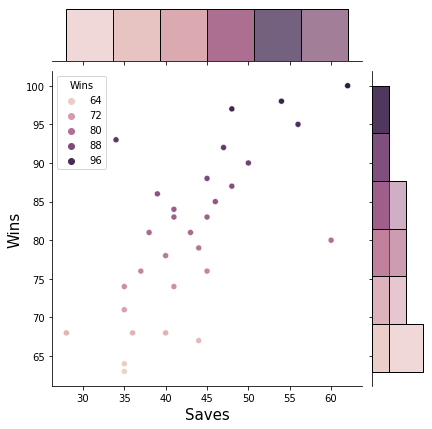

In [89]:
ax= sns.JointGrid(x="Saves", y= "Wins", hue= "Wins", data= data)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Saves', ylabel='Wins', fontsize=15)
plt.show()

#### Observations:
1. Here if saves increases the number of wins also increased.


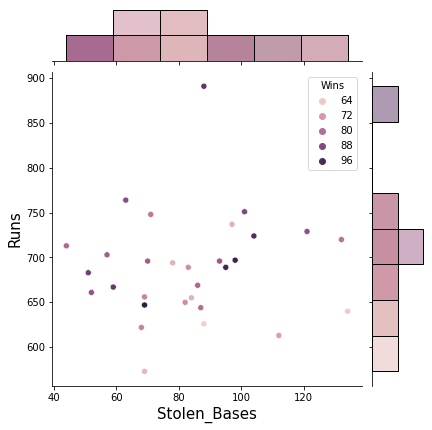

In [97]:
ax= sns.JointGrid(x="Stolen_Bases", y= "Runs", hue= "Wins", data= data)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Stolen_Bases', ylabel='Runs', fontsize=15)
plt.show()

#### Observations:

1. No clear relation is present between stolen_bases and runs

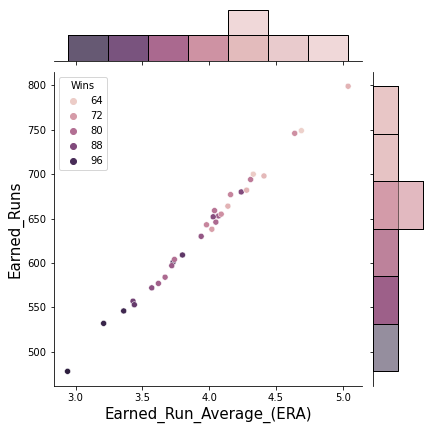

In [98]:
ax= sns.JointGrid(x="Earned_Run_Average_(ERA)", y= "Earned_Runs", hue= "Wins", data= data)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Earned_Run_Average_(ERA)', ylabel='Earned_Runs', fontsize=15)
plt.show()

#### Observations:
1. It is clearly seen that, Earned_Run_Average_(ERA) and Earned_Runs have positive correlation.
2. Its also conclude that Wins are inversely proportional with Earned_Run_Average_(ERA) and Earned_Runs ie. they have very strong negetive correlation with wins.

### Correlation:

In [99]:
data.corr()

Wins      Runs   At_Bats      Hits   Doubles  \
Wins                      1.000000  0.430751 -0.087947  0.037612  0.427797   
Runs                      0.430751  1.000000  0.319464  0.482856  0.560084   
At_Bats                  -0.087947  0.319464  1.000000  0.739122  0.453370   
Hits                      0.037612  0.482856  0.739122  1.000000  0.566847   
Doubles                   0.427797  0.560084  0.453370  0.566847  1.000000   
Triples                  -0.251118 -0.070072  0.435422  0.478694  0.220490   
Homeruns                  0.307407  0.671283 -0.066983 -0.090855  0.056292   
Walks                     0.484342  0.402452 -0.136414 -0.118281  0.302700   
Strikeouts                0.111850 -0.054726 -0.106022 -0.398830 -0.150752   
Stolen_Bases             -0.157234  0.081367  0.372618  0.413444  0.195027   
Runs_Allowed             -0.812952 -0.041623  0.316010  0.224324 -0.218160   
Earned_Runs              -0.809435 -0.041245  0.309686  0.252489 -0.235531   
Earned_Run_Average_(ERA) -0.819600 -0.049281  0.255551  0.231172 -0.254854   
Complete_Games            0.080533  0.232042 -0.080876  0.147955  0.306675   
Shutouts                  0.471805 -0.103274 -0.197321 -0.145559  0.057998   
Saves                     0.666530 -0.096380 -0.106367 -0.130371  0.171576   
Errors                   -0.089485 -0.023262  0.316743 -0.033173  0.105754   

                           Triples  Homeruns     Walks  Strikeouts  \
Wins                     -0.251118  0.307407  0.484342    0.111850   
Runs                     -0.070072  0.671283  0.402452   -0.054726   
At_Bats                   0.435422 -0.066983 -0.136414   -0.106022   
Hits                      0.478694 -0.090855 -0.118281   -0.398830   
Doubles                   0.220490  0.056292  0.302700   -0.150752   
Triples                   1.000000 -0.430915 -0.454949   -0.141196   
Homeruns                 -0.430915  1.000000  0.425691    0.359923   
Walks                    -0.454949  0.425691  1.000000    0.233652   
Strikeouts               -0.141196  0.359923  0.233652    1.000000   
Stolen_Bases              0.457437 -0.136567 -0.098347    0.030968   
Runs_Allowed              0.314125 -0.103903 -0.416445   -0.129745   
Earned_Runs               0.340225 -0.085922 -0.452663   -0.161612   
Earned_Run_Average_(ERA)  0.330951 -0.090917 -0.459832   -0.180368   
Complete_Games           -0.065898  0.156502  0.462478   -0.093418   
Shutouts                 -0.041396 -0.019119  0.426004    0.237721   
Saves                    -0.142370 -0.028540  0.099445    0.126297   
Errors                    0.126678 -0.207597 -0.075685    0.155133   

                          Stolen_Bases  Runs_Allowed  Earned_Runs  \
Wins                         -0.157234     -0.812952    -0.809435   
Runs                          0.081367     -0.041623    -0.041245   
At_Bats                       0.372618      0.316010     0.309686   
Hits                          0.413444      0.224324     0.252489   
Doubles                       0.195027     -0.218160    -0.235531   
Triples                       0.457437      0.314125     0.340225   
Homeruns                     -0.136567     -0.103903    -0.085922   
Walks                        -0.098347     -0.416445    -0.452663   
Strikeouts                    0.030968     -0.129745    -0.161612   
Stolen_Bases                  1.000000      0.132290     0.143068   
Runs_Allowed                  0.132290      1.000000     0.991018   
Earned_Runs                   0.143068      0.991018     1.000000   
Earned_Run_Average_(ERA)      0.126063      0.986674     0.997248   
Complete_Games               -0.020783     -0.016659    -0.020221   
Shutouts                     -0.106563     -0.636862    -0.630192   
Saves                        -0.183418     -0.616224    -0.589663   
Errors                        0.079149      0.198996     0.136921   

                          Earned_Run_Average_(ERA)  Complete_Games  Shutouts  \
Wins                                     

In [100]:
a= data.corr()['Wins'].drop(['Wins'])
a

Runs                        0.430751
At_Bats                    -0.087947
Hits                        0.037612
Doubles                     0.427797
Triples                    -0.251118
Homeruns                    0.307407
Walks                       0.484342
Strikeouts                  0.111850
Stolen_Bases               -0.157234
Runs_Allowed               -0.812952
Earned_Runs                -0.809435
Earned_Run_Average_(ERA)   -0.819600
Complete_Games              0.080533
Shutouts                    0.471805
Saves                       0.666530
Errors                     -0.089485
Name: Wins, dtype: float64

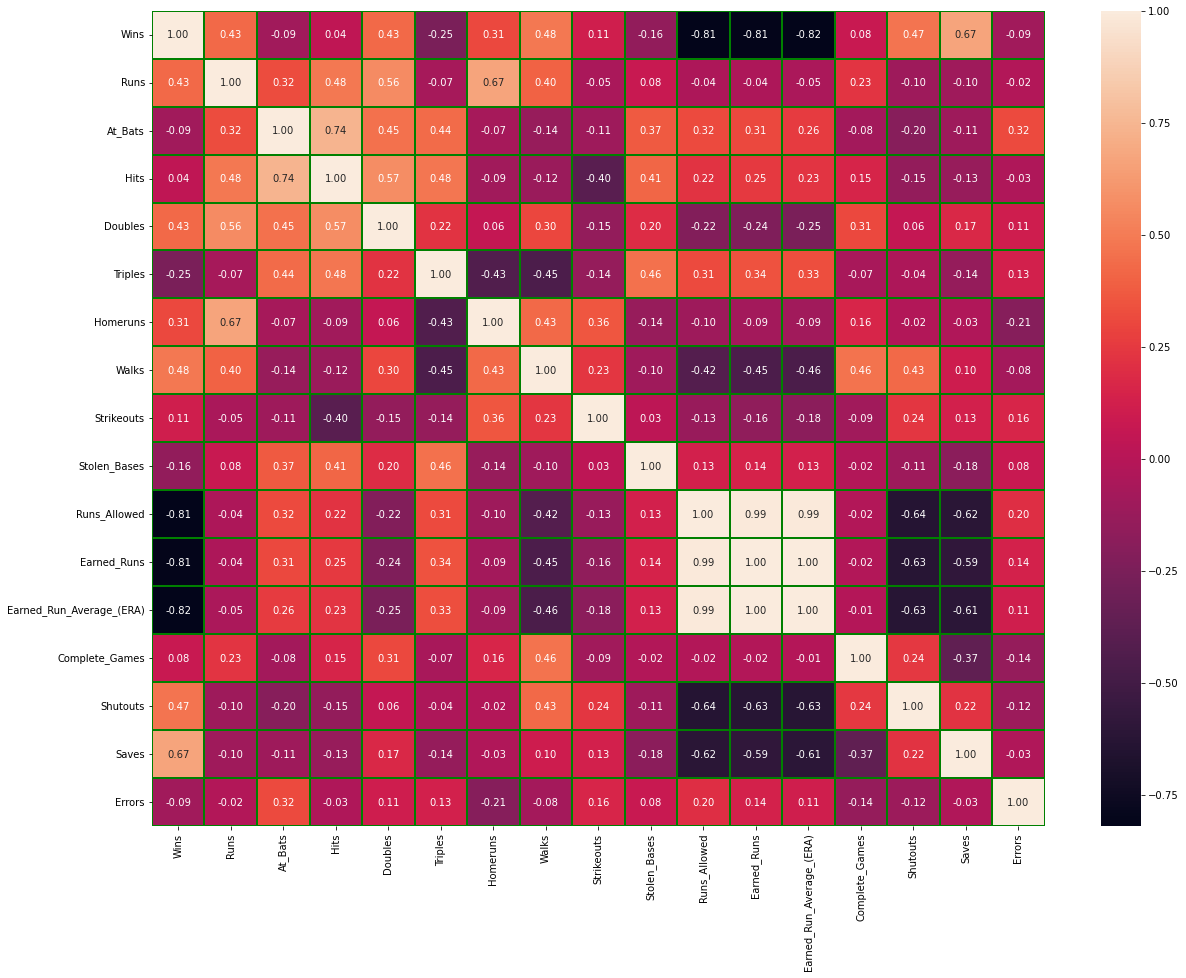

In [101]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot= True, linecolor= "green",  linewidths= 0.2, fmt='0.2f' )
plt.show()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

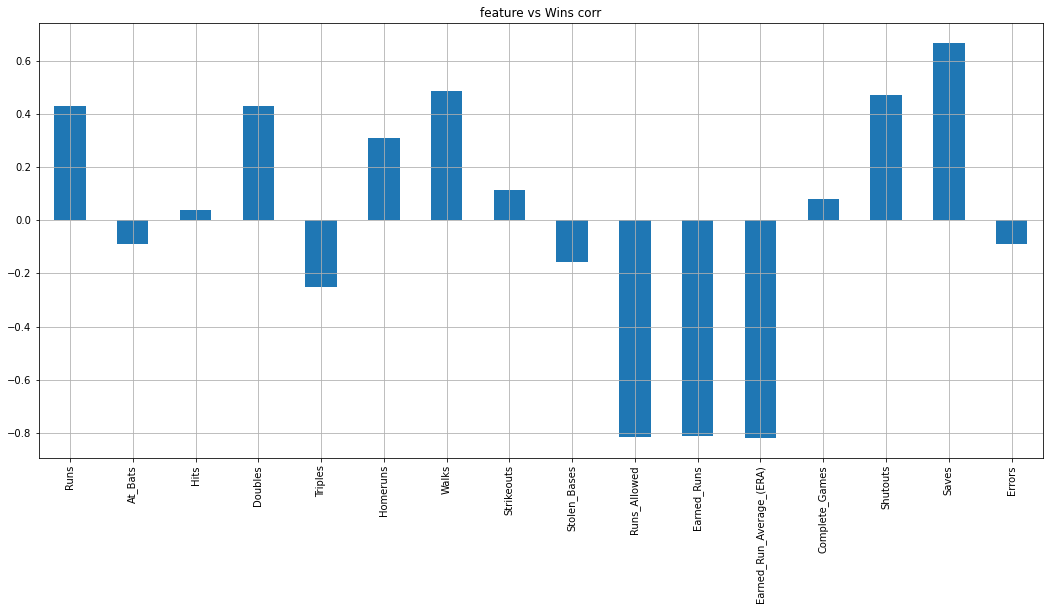

In [157]:
data.drop("Wins", axis=1).corrwith(data["Wins"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

#### Observations:
1. Runs_Allowed,Earned_Runs and Earned_Run_Average_(ERA) are highly correlated with each other.
2. Light shade means Strong Positive correlation
3. Darker shade means Strong Negetive correlation
3. Runs_Allowed,Earned_Runs, Earned_Run_Average_(ERA) are highly correlated with Wins(negetive relation)
4. Hits, At_bats and errors have very less correlation with Wins
5. At_Bat and Hits are 0.74 correlated with each other but very poor correlated with Wins.

### Checking Outliers:
From the previous Boxplot , it is seen that there is some outiers in Errors columns.
Let's remove it.
#### Using Z score method:
Let's take the Z Score =3
Any data with Z Score>3, should to be rejected 

In [158]:
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [159]:
data_new = data[(z<3).all(axis = 1)]
data_new.head()

Wins  Runs  At_Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   
2    81   669     5439  1395      303       29       141    533        1157   
3    76   622     5533  1381      260       27       136    404        1231   
4    74   689     5605  1515      289       49       151    455        1259   

   Stolen_Bases  Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  \
0           104           641          601                      3.73   
1            70           700          653                      4.07   
2            86           640          584                      3.67   
3            68           701          643                      3.98   
4            83           803          746                      4.64   

   Complete_Games  Shutouts  Saves  Errors  
0               2         8     56      88  
1               2        12     45      86  
2              11        10     38      79  
3               7         9     37     101  
4               7        12     35      86

In [160]:
data_new.shape

(29, 17)

In [161]:
data.shape

(30, 17)

Previous rows were 30, and the loss of data= (30-29)=1 datapoint

Wins                           AxesSubplot(0.125,0.657941;0.110714x0.222059)
Runs                        AxesSubplot(0.257857,0.657941;0.110714x0.222059)
At_Bats                     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Hits                        AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Doubles                     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Triples                     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Homeruns                       AxesSubplot(0.125,0.391471;0.110714x0.222059)
Walks                       AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Strikeouts                  AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Stolen_Bases                AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Runs_Allowed                AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Earned_Runs                 AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Earned_Run_Average_(ERA)          AxesSubplot(0.125,0.125;0.110714x0.222059)

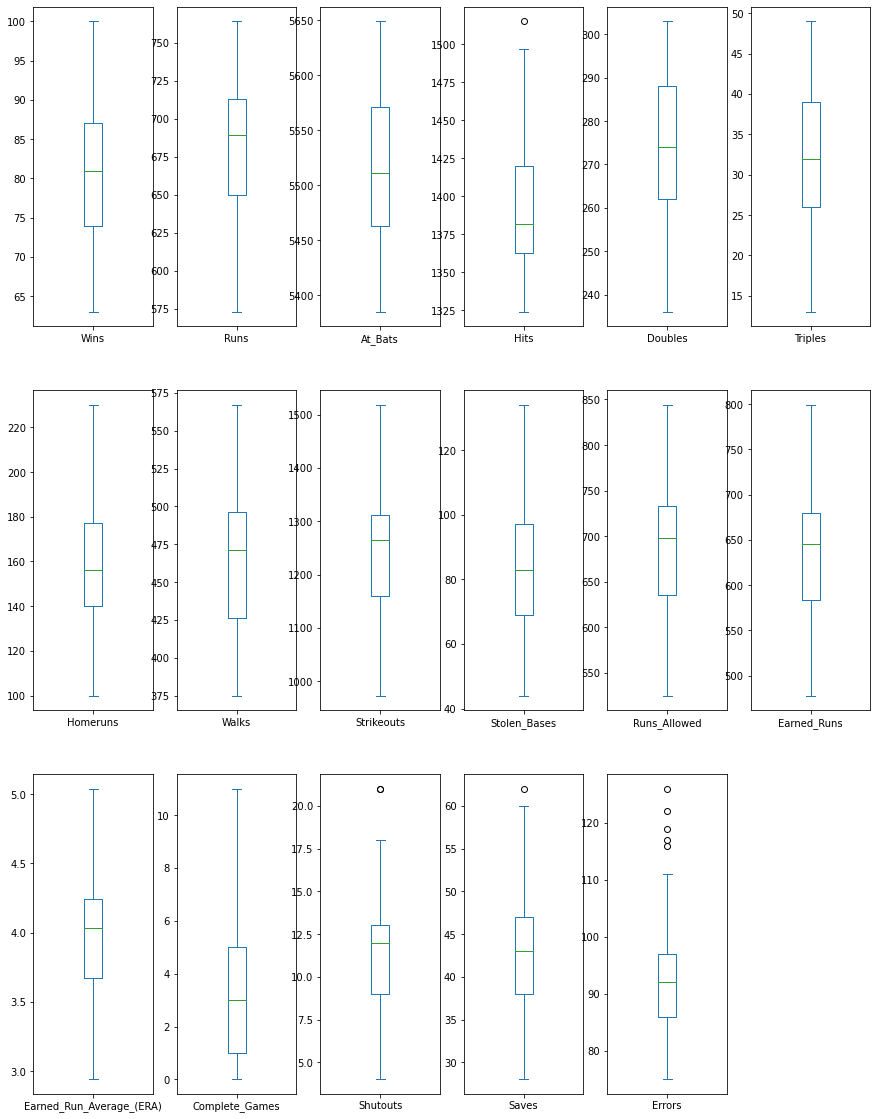

In [162]:
data_new.plot(kind ='box', subplots =True , layout =(3,6), figsize = (15,20), )

#### Observations:

Mainly outiers are present in Errors columns. But after removing outliers by Z score method it is seen that still there is some outliers in errors column. As the dataset is not big (30 rows), let's keep the remaining part as the deletation made the loss of data which means the loss of informations.

### Checking Skewness:

In [163]:
data_new.skew()

Wins                        0.119013
Runs                       -0.215364
At_Bats                     0.169573
Hits                        0.783772
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Complete_Games              0.854980
Shutouts                    0.526943
Saves                       0.627480
Errors                      0.840271
dtype: float64

#### Observations:

1. The standard range for skewness is between -0.5 to 0.5.
2. Hits, Shutouts, Saves, Complete_Games snd Errors are positively skewed in nature, need to transform.

#### Let's transform all the positive skewed data using boxcox transformation:

In [164]:
data2= data_new.copy()
data2.head()

Wins  Runs  At_Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   
2    81   669     5439  1395      303       29       141    533        1157   
3    76   622     5533  1381      260       27       136    404        1231   
4    74   689     5605  1515      289       49       151    455        1259   

   Stolen_Bases  Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  \
0           104           641          601                      3.73   
1            70           700          653                      4.07   
2            86           640          584                      3.67   
3            68           701          643                      3.98   
4            83           803          746                      4.64   

   Complete_Games  Shutouts  Saves  Errors  
0               2         8     56      88  
1               2        12     45      86  
2              11        10     38      79  
3               7         9     37     101  
4               7        12     35      86

In [168]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method= 'yeo-johnson')

features=['Hits', 'Shutouts', 'Saves', 'Complete_Games','Errors']
data2[features]= scaler.fit_transform(data2[features].values)
data2[features].head()

Hits  Shutouts     Saves  Complete_Games    Errors
0  1.511088 -0.788438  1.525469       -0.320269 -0.331639
1 -0.872867  0.231954  0.316817       -0.320269 -0.528285
2  0.093288 -0.257567 -0.661564        2.051237 -1.343238
3  0.093288 -0.517023 -0.819490        1.274091  0.661128
4  1.511088  0.231954 -1.151522        1.274091 -0.528285

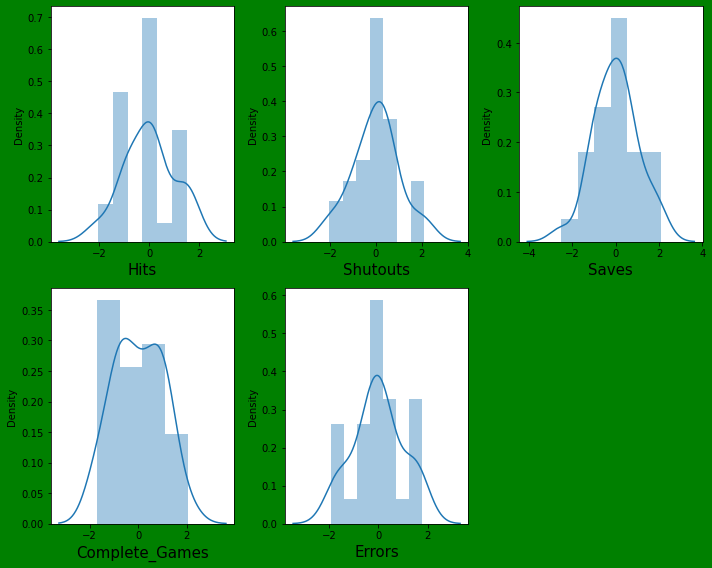

In [169]:
plt.figure(figsize=(10,8),facecolor='green')
plno=1
for x in data2[features]:
    if plno<=5:
        plt.subplot(2,3,plno)
        sns.distplot(data2[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Skewness after transforming skewed features

In [170]:
data2.skew()

Wins                        0.119013
Runs                       -0.215364
At_Bats                     0.169573
Hits                       -0.033725
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Complete_Games             -0.001006
Shutouts                    0.031562
Saves                      -0.033384
Errors                     -0.016499
dtype: float64

#### Observations:
All skewness are removed from the whole dataset.

### Check Multicollinearity problem:

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data2,i)for i in range(data2.shape[1])]
vif["Features"] = data2.columns
vif

VIF                  Features
0     1180.934862                      Wins
1     2408.535611                      Runs
2     3948.039836                   At_Bats
3        5.129030                      Hits
4     1145.108057                   Doubles
5       36.021682                   Triples
6      291.196055                  Homeruns
7      256.411276                     Walks
8      428.444721                Strikeouts
9       25.878137              Stolen_Bases
10   26088.692636              Runs_Allowed
11  101071.523638               Earned_Runs
12   41492.784120  Earned_Run_Average_(ERA)
13       3.466686            Complete_Games
14       3.354234                  Shutouts
15       9.086733                     Saves
16       1.809429                    Errors

#### Observations:
##### There is a huge VIF Values in many cases. For Earned_Runs it is 53592.82 !!!!

The reasons may be:
1. Runs_Allowed, Earned_Runs, Earned_Run_Average_(ERA) are highly correlated with each other.
2. Some of the features are correlated with each other but less correlation with target variables.

#### Let's do Features selection 
### Feature Selection Using PCA:

#### Data Standarization:

In [172]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#seperate Features(x) and Lable(y)
x=data2.drop(columns=['Wins'])
y=data2['Wins']

#data standarization
x_scale= scaler.fit_transform(x)

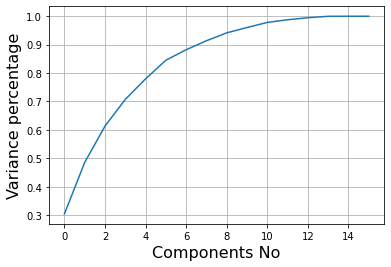

In [188]:
from sklearn.decomposition import PCA
pca = PCA()

#plot the graph to find the principal components

x_pca = pca.fit_transform(x_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components No', fontsize= 16)
plt.ylabel('Variance percentage', fontsize= 16)
plt.grid()
plt.show()

#### Observations:
For components= 10, the variance percentage is >0.95 i.e. greater than 95%.

Let's keep top 10 features for model evaluation

In [192]:
pca_new = PCA(n_components=10)
x_scale_new = pca_new.fit_transform(x_scale)
x_scale_final= pd.DataFrame(x_scale_new)

In [194]:
x_scale_final.head()

0         1         2         3         4         5         6  \
0  0.994657 -2.782054  2.281212 -0.640300 -2.489728  0.026077  0.757494   
1  0.028960  0.433555  0.323978 -0.043339 -0.345840  0.496813 -1.044965   
2 -1.171899 -0.904476  0.176959  2.778986 -0.831788 -0.493813  1.348273   
3  0.824805  1.218816  0.749376  0.774398  0.364405 -1.194554 -0.125523   
4  3.287726 -1.233760 -0.638232  1.697389  0.137845  0.189722 -1.136240   

          7         8         9  
0  0.597465  0.627595  0.251593  
1  1.331109  0.016354 -0.666013  
2  0.956126 -0.056156  0.530511  
3 -0.342542  0.059026  1.548231  
4  0.133592 -1.086333 -0.049116

#### check VIF after feature selection:

In [196]:

vif_final= pd.DataFrame()
vif_final['VIF']= [variance_inflation_factor(x_scale_final.values,i) for i in range(x_scale_final.shape[1])]
vif_final['Top 10 Features']= x_scale_final.columns
vif_final

VIF  Top 10 Features
0  1.0                0
1  1.0                1
2  1.0                2
3  1.0                3
4  1.0                4
5  1.0                5
6  1.0                6
7  1.0                7
8  1.0                8
9  1.0                9

### Final predictions using different Regression ML Models:
#### Find best Random state:

In [206]:
from sklearn.linear_model import LinearRegression

r2_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.9772830521801708 on Random_state 1585


In [202]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (21, 10)
Training target shape: (21,)
Test feature shape: (8, 10)
Test target shape: (8,)


#### Observations:
For random state=1585, the accuracy score is best. Lets take this random state for further steps.

### Using LinearRegression()

In [208]:
x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=1585)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9772830521801708
Mean absolute error: 1.373073491059225
Mean square error: 2.9982821599077747
Root mean square error: 1.7315548388392943


#### Using GridSearchCV:

In [260]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [261]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9772830521801708
Mean absolute error: 1.373073491059225
Mean square error: 2.9982821599077747
Root mean square error: 1.7315548388392943


#### Observations:

No such improvement seen after GridSearchCV.
### Using DecisionTreeRegressor():

In [212]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.43364508109387945
Mean absolute error: 7.0
Mean square error: 74.75
Root mean square error: 8.645808232895291


#### Using GridSearchCV:

In [213]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : range(15,30),
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,4)}

grid_search = GridSearchCV(estimator = dt,cv=9,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [214]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.10737539955013609
Mean absolute error: 9.645833333333334
Mean square error: 146.15625
Root mean square error: 12.089509915625198


#### Observations:

After using Grid seaech CV, R2 is negative. When the chosen model does not follow the trend of the data and fits worse, then the r2 score becomes negetive. So here we just reject DecisionTreeRegressor() for our model building.

### Using KNeighborsRegressor():

In [219]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0, 8):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)


RMSE value for k=  1 is: 6.324555320336759
RMSE value for k=  2 is: 8.789197915623474
RMSE value for k=  3 is: 6.505339687091247
RMSE value for k=  4 is: 5.371365049966349
RMSE value for k=  5 is: 5.927478384608417
RMSE value for k=  6 is: 6.513607551375302
RMSE value for k=  7 is: 6.3811744808539785
RMSE value for k=  8 is: 6.633102356740773


In [220]:
min(rmse_val)

5.371365049966349

#### For k=4 we get the best RMSE value for KNeighborsRegressor()

In [221]:
knn =KNeighborsRegressor(n_neighbors= 4)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7814016810702025
Mean absolute error: 4.71875
Mean square error: 28.8515625
Root mean square error: 5.371365049966349


#### Using GridSearchCV

In [227]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [30,40,25,34,10,15,22], 'n_jobs':[1,-1],
             'n_neighbors' : [4],'weights': ['uniform', 'distance'], 'p':[1,2,3]}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [228]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7675742010544155
Mean absolute error: 4.781100776659192
Mean square error: 30.676573807708618
Root mean square error: 5.538643679431691


#### Observations:


Nothing is improved after GridSearchCV.
### Using RandomForestRegressor():

In [229]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6061769622351132
Mean absolute error: 6.363749999999998
Mean square error: 51.978487499999986
Root mean square error: 7.2096107731277685


#### Using GridSearchCV:

In [230]:
params = {'n_estimators' : [100,110,80], 'criterion' : ["squared_error", "absolute_error"], 
          'min_samples_split' : [3,2,1], 'n_jobs': [1,-1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'squared_error', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 1}


In [231]:

grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6238965786669824
Mean absolute error: 6.032500000000001
Mean square error: 49.639774999999986
Root mean square error: 7.045550014015938


#### Observations:

r2 score, RMSE slightly improved after GridSearchCV.
### Using Support Vector Regression():

In [243]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.16372476464631325
Mean absolute error: 8.501208144732647
Mean square error: 110.37526426613425


In [245]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.37857042274566133
Mean absolute error: 7.432221228590249
Mean square error: 82.01899436042811


In [244]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.9288990349880251
Mean absolute error: 2.508146384935495
Mean square error: 9.384216429002388


#### Using GridSearchCV:

In [248]:
params = {'gamma':['scale', 'auto'],'C':[1.0,10,10, 0.5,0.1,0.001], 'tol':[0.01,0.001,0.002,0.0001], 'kernel':['linear']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 7)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.001}


In [249]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6934777442939687
Mean absolute error: 5.195895442907386
Mean square error: 40.456148342950726
Root mean square error: 6.360514786002052


#### Observations:


r2 score, RMSE are not improved after GridSearchCV.
### Using GradientBoostingRegressor()

In [250]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6520237987572803
Mean absolute error: 5.278409850816926
Mean square error: 45.92742143589457
Root mean square error: 6.776977308202719


#### Using GridSearchCV:

In [236]:
params = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'n_estimators':[100,150,80],
          'criterion':['friedman_mse', 'squared_error', 'mse'], 'min_samples_leaf':range(1,5),
         'max_features': ['auto', 'sqrt', 'log2']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'criterion': 'squared_error', 'loss': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 150}


In [237]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7402863684466136
Mean absolute error: 5.064135478769003
Mean square error: 34.27814133955399
Root mean square error: 5.854753738591743


#### Observations:

r2 score, RMSE are improved after GridSearchCV.
### Using AdaBoostRegressor():

In [238]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6837512976067663
Mean absolute error: 5.442559523809523
Mean square error: 41.73988732993195
Root mean square error: 6.460641402363387


#### Using GridSearchCV:

In [239]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.5] ,
        'n_estimators':[50,90,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 50}


In [240]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6763526827407496
Mean absolute error: 5.416666666666666
Mean square error: 42.71638888888889
Root mean square error: 6.53577760399548


#### Observations:

r2 score, RMSE are not improved after GridSearchCV.



#### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is  LinearRegression(). 

Let's check the cross validation score before final prediction.

### Cross Validation:

In [273]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , dt , knn , grid_rf_best , svr_lin , grid_gbdt_best, ada]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [ 0.71462021 -0.40939139  0.61819192  0.23682466 -0.12732283]

Mean CV Score : 0.20658451579997533

Std deviation : 0.42880201099778426

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor()

 Cross Validation Score :  [-2.06818182 -9.28947368  0.35173568  0.33770492  0.57252358]

Mean CV Score : -2.019138264800859

Std deviation : 3.7617189303057548

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=4)

 Cross Validation Score :  [-0.34850852 -1.09292763  0.48316604  0.4442623   0.85056751]

Mean CV Score : 0.06731193837645892

Std deviation : 0.6996539163811066

-----------
-----------
Cross Validation Score of : RandomForestRegressor(n_jobs=1)

 Cross Validation Score :  [ 0.07098318 -4.50867237  0.5233678   0.36661213  0.87867512]

Mean CV Score : -0.5338068283259005

Std deviation : 2.004435319753598

-----------
-----------
Cross Validation Score of :

### Checking overfitting problem:

In [267]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

2.7914893727933427

In [268]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.8626512041046206


In [269]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.8611

In [270]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.9786097423365467


#### Observations:
After using LASSO() and Ridge(), there is no large change in score. So this model is not  OVERFITTED.

### Conclusion:

### Our final model is Linear Regression() for this particular dataset
## Final Model:

In [274]:
y_pred = lin_reg.predict(x_test)
y_pred

array([ 86.63362468,  81.33762599,  64.39210441, 101.28495561,
        84.08251572,  90.94662952,  66.99014434,  76.19053537])

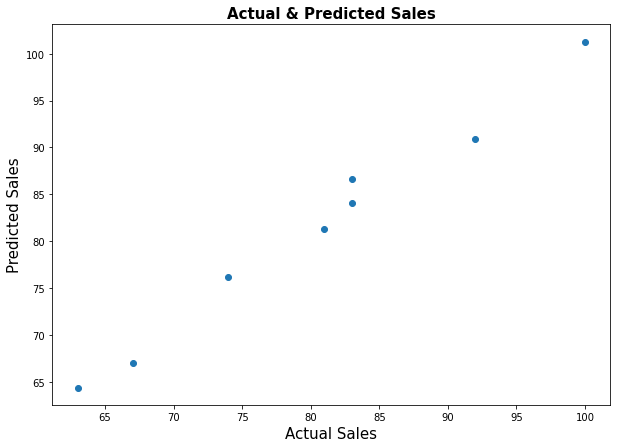

In [275]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", fontsize= 15)
plt.ylabel("Predicted Sales",fontsize= 15)
plt.title("Actual & Predicted Sales" , fontsize= 15, fontweight= 'bold')
plt.show()

In [276]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.9772830521801708

Final Mean absolute error: 1.373073491059225

Final Mean square error: 2.9982821599077747

Final Root mean square error: 1.7315548388392943


### Coefficient:

In [281]:
coefficient= lin_reg.coef_
coefficient

array([-3.50684334, -2.74480819, -0.0634977 , -1.61044697, -1.57170376,
       -0.45924533, -0.73172424,  1.9866319 ,  0.95238417, -1.0925809 ])

### Load and save the model
Now , let's save the model for future use.

In [286]:
import pickle
pickle.dump(lin_reg, open("Baseball_Prediction_model", "wb"))
load_Baseball_Prediction_model= pickle.load(open("Baseball_Prediction_model", "rb"))

In [287]:
y_pred = load_Baseball_Prediction_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

Predicted Values  Actual Values
3        101.284956            100
0         86.633625             83
4         84.082516             83
1         81.337626             81
7         76.190535             74
5         90.946630             92